In [ ]:
import pandas as pd
import os

# Step 1: Load Data
csv_path = "/content/drive/MyDrive/men-casual-shirts.csv" # Update this path if your file is elsewhere

# Check if the CSV file exists
if not os.path.exists(csv_path):
    print(f"Error: The file '{csv_path}' was not found.")
else:
    # Read the CSV file into a pandas DataFrame
    # Ensure all columns, including 'IMAGE', are read correctly
    df = pd.read_csv(csv_path, dtype={'IMAGE': str}) # Explicitly set dtype for IMAGE
    print("CSV file loaded successfully.")
    # Display the first few rows to confirm
    display(df.head())

CSV file loaded successfully.


SERIAL NO                                               NAME  \
0          1  Roadster Men Blue Regular Fit Printed Casual S...   
1          2  HIGHLANDER Men Navy & Red Slim Fit Checked Cas...   
2          3  Levis Men Blue Slim Fit Solid Casual Chambray ...   
3          4  Mast & Harbour Men Navy Blue Slim Fit Solid De...   
4          5  ether Men Blue Slim Fit Antimicrobial Filafil ...   

        CATEGORY                                DESCRIPTION & COLOR  \
0  casual-shirts  Roadster Men Blue Regular Fit Printed Casual S...   
1  casual-shirts  HIGHLANDER Men Navy & Red Slim Fit Checked Cas...   
2  casual-shirts  Levis Men Blue Slim Fit Solid Casual Chambray ...   
3  casual-shirts  Mast & Harbour Men Navy Blue Slim Fit Solid De...   
4  casual-shirts  Ether Men Blue Slim Fit Antimicrobial Filafil ...   

        FABRIC                                              IMAGE  \
0      Cotton   https://assets.myntassets.com/h_1440,q_100,w_1...   
1  100% cotton  https://assets.myntassets.com/h_1440,q_100,w_1...   
2       Cotton  https://assets.myntassets.com/h_1440,q_100,w_1...   
3  100% cotton  https://assets.myntassets.com/h_1440,q_100,w_1...   
4          NaN  https://assets.myntassets.com/h_1440,q_100,w_1...   

           SIZE  PRICE  PRODUCT ID WEBSITE  \
0  Regular fit     839     1364628  Myntra   
1      Slim fit    499     2336927  Myntra   
2      Slim fit   1959     6841316  Myntra   
3      Slim Fit   1139     4368075  Myntra   
4     Slim fit     659     1166655  Myntra   

                                         PRODUCT URL  
0  https://www.myntra.com/shirts/roadster/roadste...  
1  https://www.myntra.com/shirts/highlander/highl...  
2  https://www.myntra.com/shirts/levis/levis-men-...  
3  https://www.myntra.com/shirts/mast--harbour/ma...  
4  https://www.myntra.com/shirts/ether/ether-men-...

In [ ]:
import requests
import os
from PIL import Image # Import Image for verification

# Step 2: Download Images from IMAGE column

# Mount Google Drive to save images permanently
from google.colab import drive
drive.mount('/content/drive')

# Define the path to save images in Google Drive
# Make sure to create this folder in your Google Drive if it doesn't exist
drive_image_folder = "/content/drive/MyDrive/shirt_images_permanent"
os.makedirs(drive_image_folder, exist_ok=True)

# Make sure IMAGE column exists in the DataFrame
if "IMAGE" not in df.columns:
    df["IMAGE"] = ""

# Download each product image
for idx, row in df.iterrows():
    # Print progress
    print(f"Processing image {idx + 1}/{len(df)}")

    # Use the IMAGE column for the direct image URL
    url = row["IMAGE"]
    # Construct the save path in Google Drive
    img_path = os.path.join(drive_image_folder, f"{row['PRODUCT ID']}.jpg")

    # Check if the URL is valid before attempting to download
    if pd.isna(url) or url == "":
        print(f"Skipping row {idx}: Invalid or empty IMAGE URL.")
        df.at[idx, "IMAGE"] = "" # Clear image path in dataframe
        continue

    try:
        if not os.path.exists(img_path):  # Skip if already downloaded
            r = requests.get(url, timeout=10, stream=True) # Increased timeout and added stream=True
            r.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
            with open(img_path, "wb") as f:
                for chunk in r.iter_content(chunk_size=8192): # Download in chunks
                    f.write(chunk)
        # Verify if the downloaded file is a valid image
        try:
            Image.open(img_path).verify()
            # Update dataframe with local image path (now in Drive)
            df.at[idx, "IMAGE"] = img_path
        except Exception as img_e:
            print(f"❌ Invalid image file {img_path} from {url}: {img_e}")
            if os.path.exists(img_path):
                os.remove(img_path) # Remove invalid file
            df.at[idx, "IMAGE"] = "" # Clear image path in dataframe
    except requests.exceptions.RequestException as req_e:
        print(f"❌ Failed to download {url}: {req_e}")
        df.at[idx, "IMAGE"] = "" # Clear image path in dataframe
    except Exception as e:
        print(f"❌ An unexpected error occurred with {url}: {e}")
        df.at[idx, "IMAGE"] = "" # Clear image path in dataframe


print(f"✅ Product image download process completed. Images saved to {drive_image_folder}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing image 1/3864
Processing image 2/3864
Processing image 3/3864
Processing image 4/3864
Processing image 5/3864
Processing image 6/3864
Processing image 7/3864
Processing image 8/3864
Processing image 9/3864
Processing image 10/3864
Processing image 11/3864
Processing image 12/3864
Processing image 13/3864
Processing image 14/3864
Processing image 15/3864
Processing image 16/3864
Processing image 17/3864
Processing image 18/3864
Processing image 19/3864
Processing image 20/3864
Processing image 21/3864
Processing image 22/3864
Processing image 23/3864
Processing image 24/3864
Processing image 25/3864
Processing image 26/3864
Processing image 27/3864
Processing image 28/3864
Processing image 29/3864
Processing image 30/3864
Processing image 31/3864
Processing image 32/3864
Processing image 33/3864
Processing image 34/3864
Processing image 35/3864
Proce

Displaying 5 sample images:
Product: Roadster Men Blue Regular Fit Printed Casual Shirt


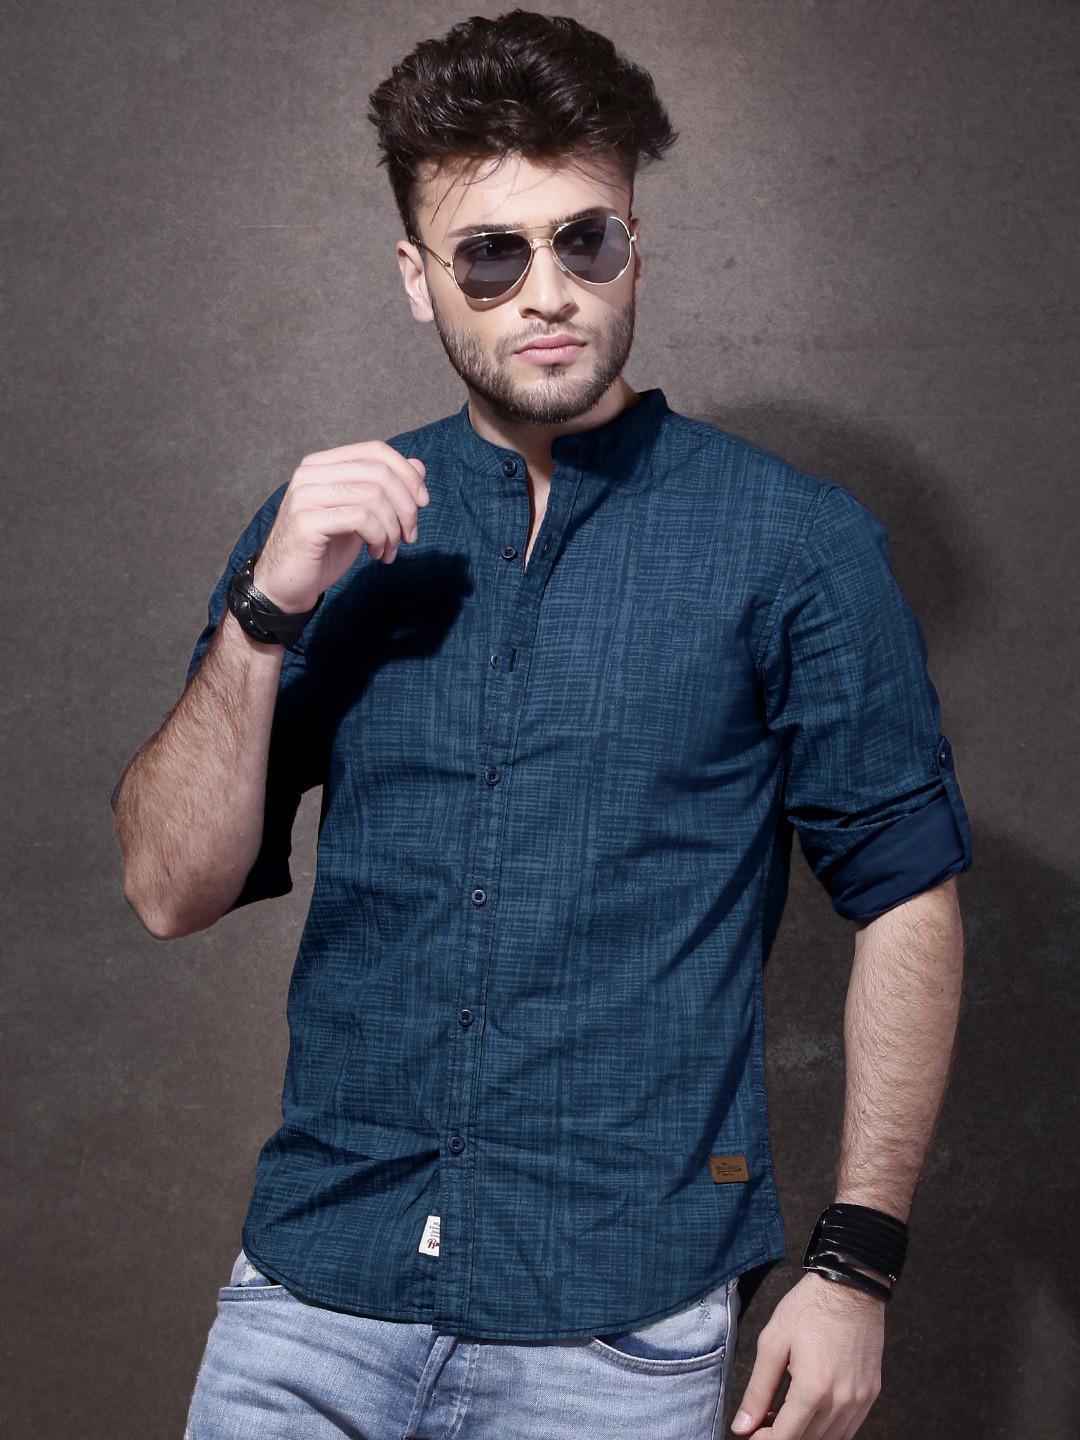

Product: HIGHLANDER Men Navy & Red Slim Fit Checked Casual Shirt


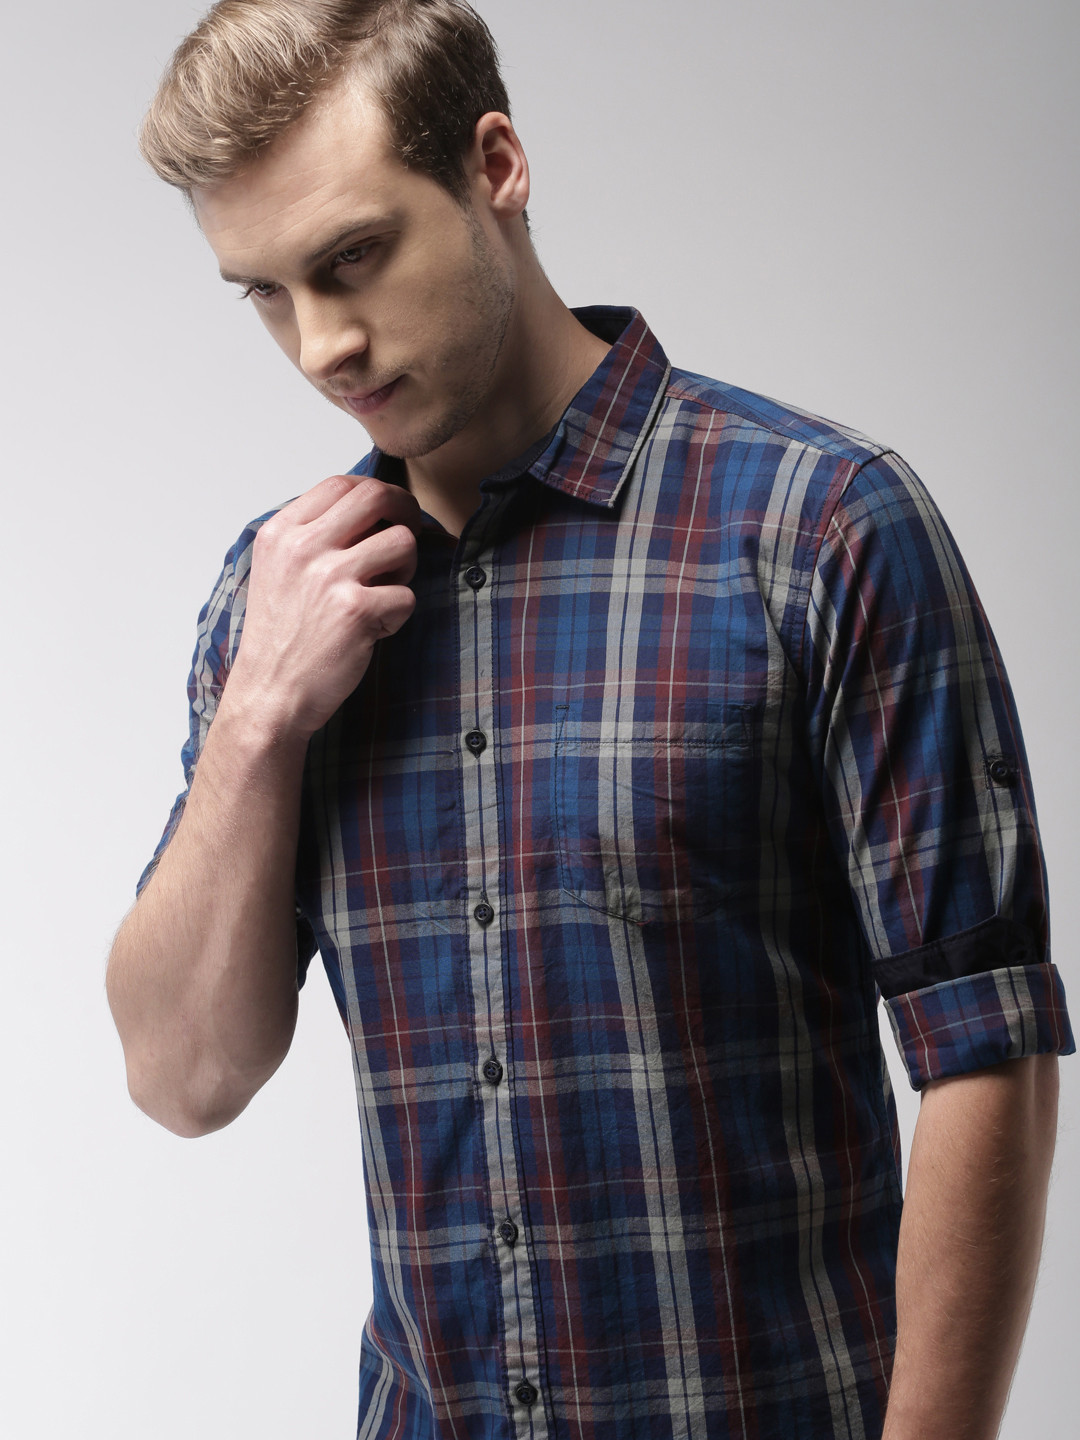

Product: Levis Men Blue Slim Fit Solid Casual Chambray Shirt


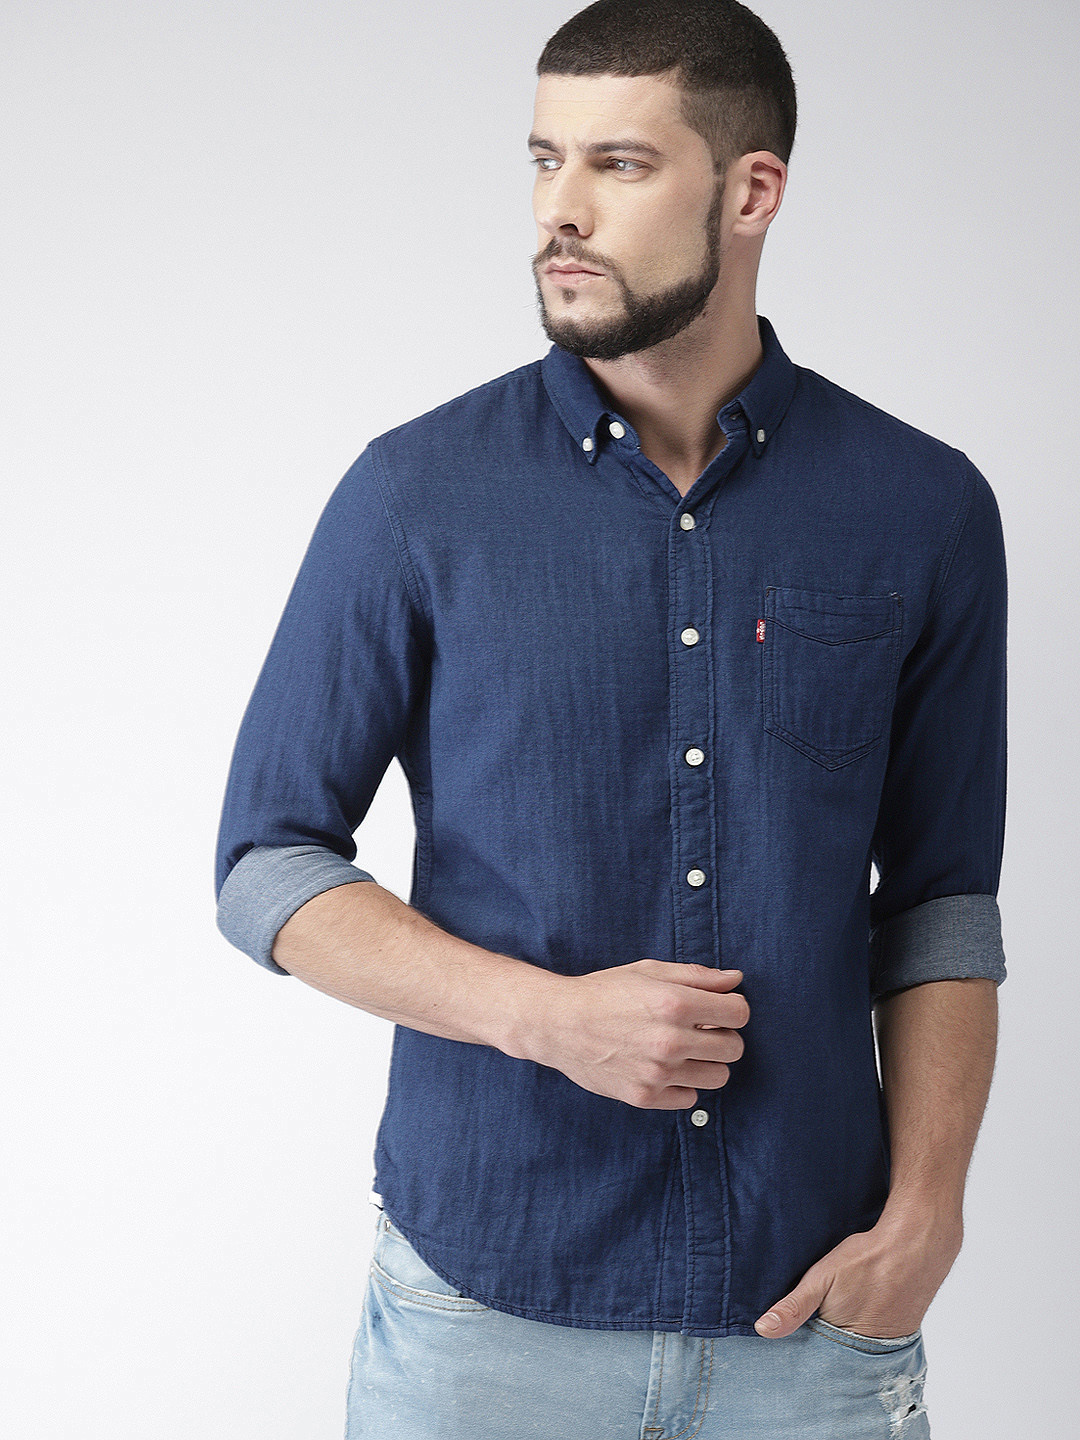

Product: Mast & Harbour Men Navy Blue Slim Fit Solid Denim Casual Shirt


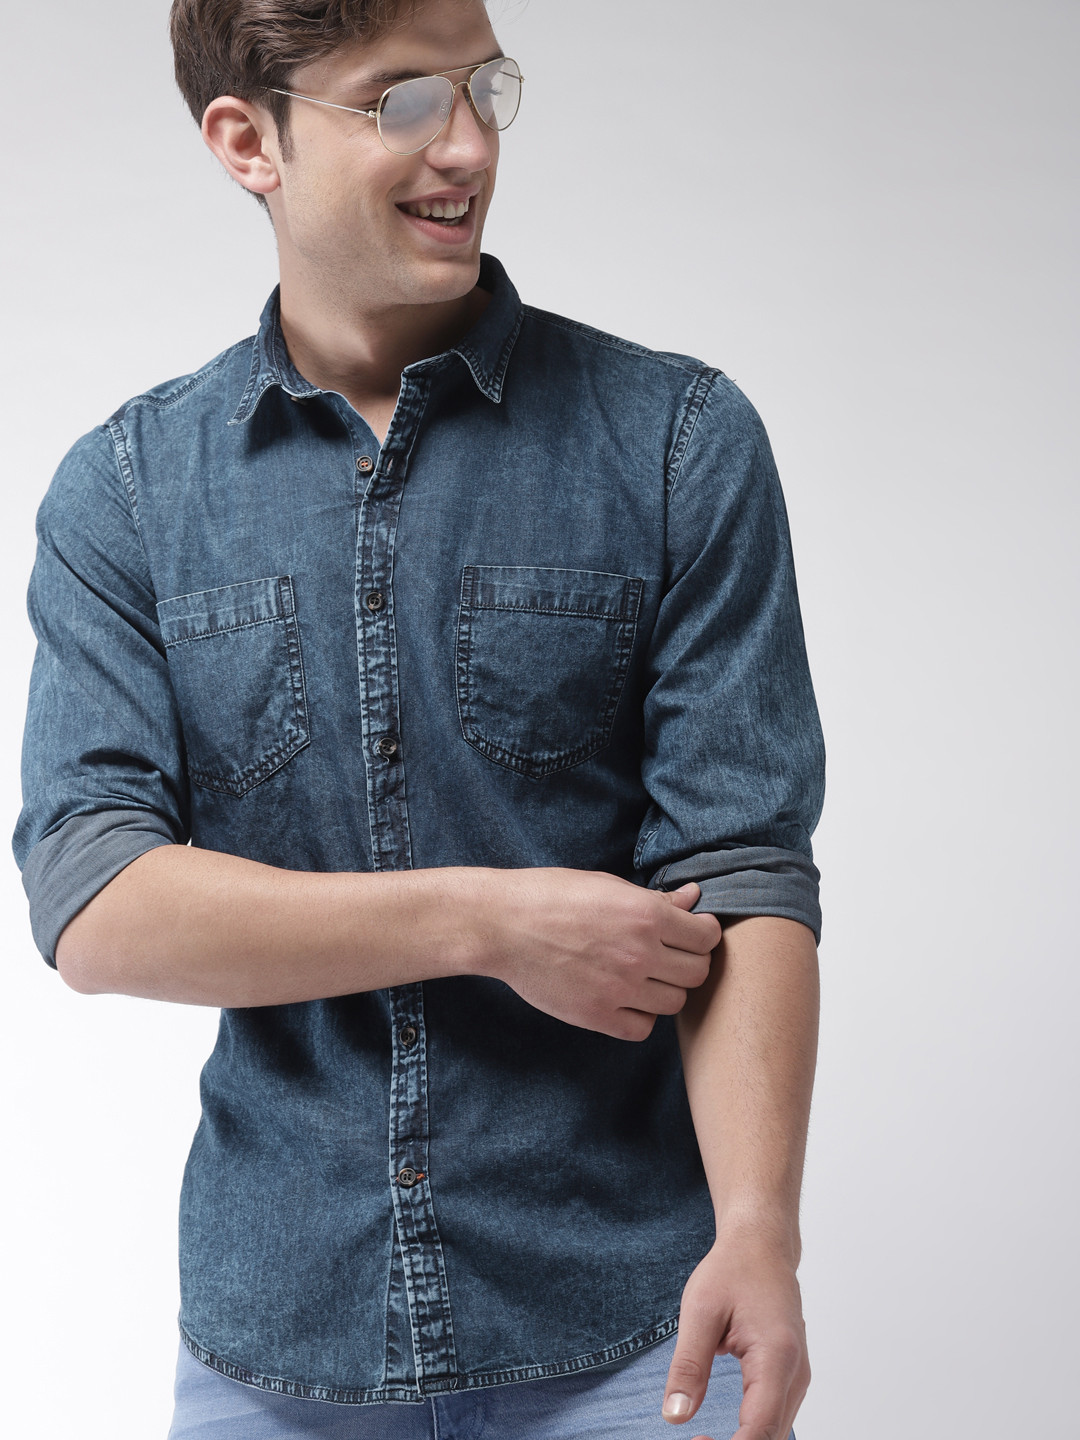

Product: ether Men Blue Slim Fit Antimicrobial Filafil Shirt


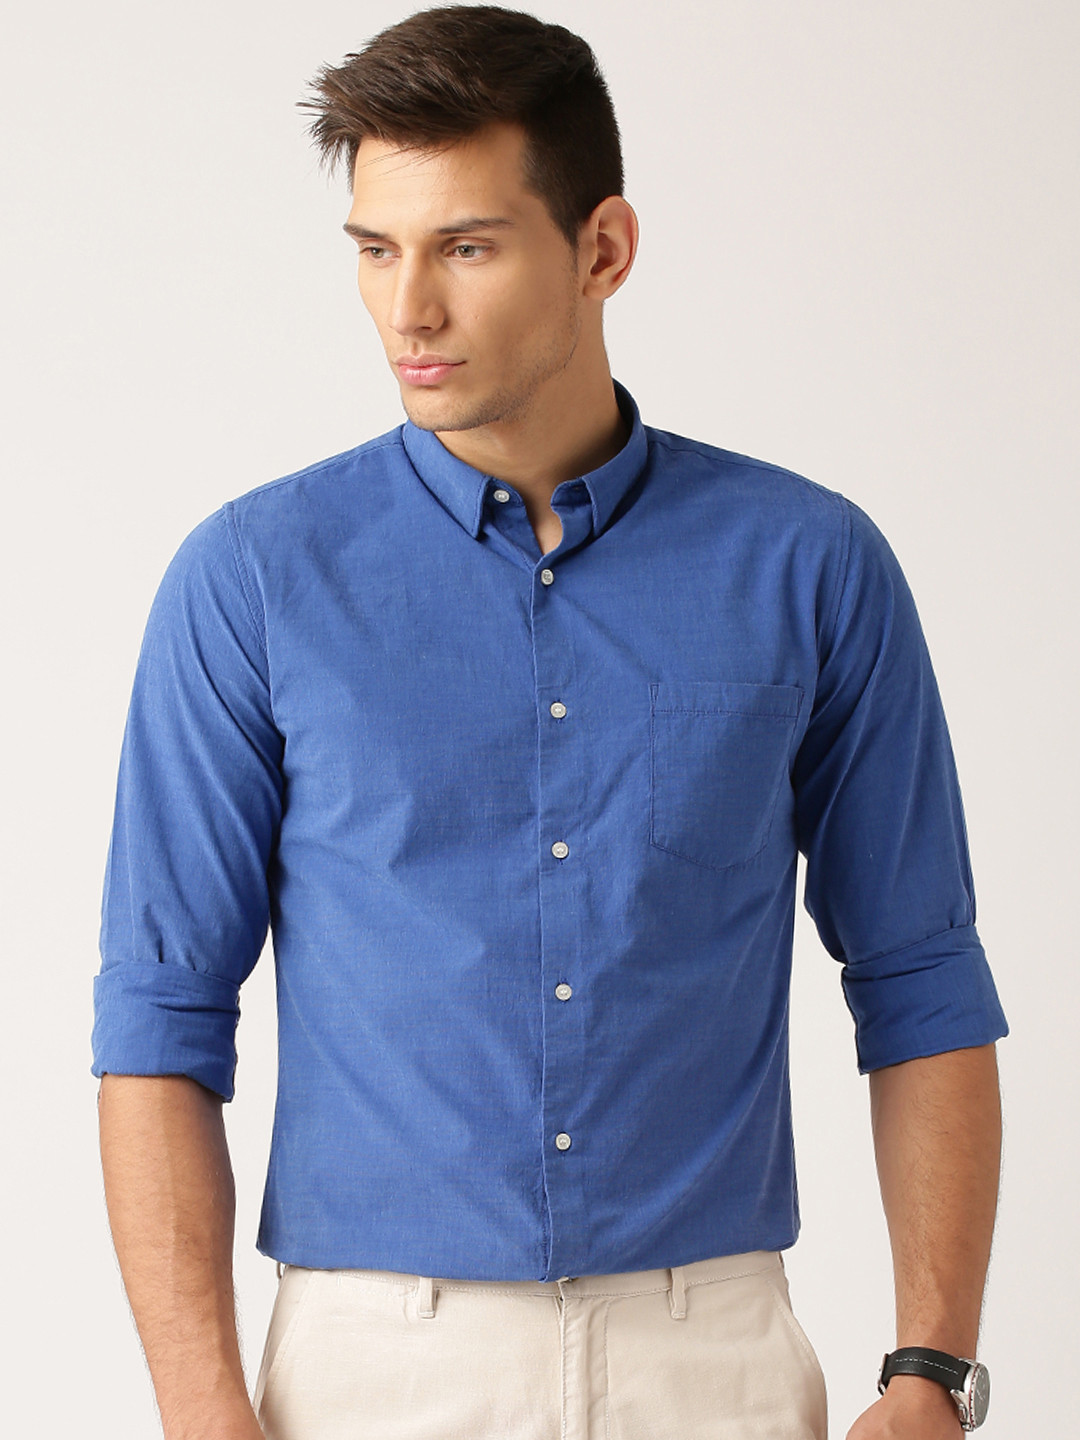

In [ ]:
from IPython.display import Image, display
import os

# Display a few of the downloaded images
image_column_name = 'IMAGE'  # Assuming the column with image paths is named 'IMAGE'

# Get the rows where the image path is not empty and exists on disk
valid_image_rows = df[
    df[image_column_name].apply(lambda x: isinstance(x, str) and os.path.exists(x))
]

if not valid_image_rows.empty:
    print(f"Displaying {min(5, len(valid_image_rows))} sample images:")
    for index, row in valid_image_rows.head(5).iterrows():
        image_path = row[image_column_name]
        product_name = row['NAME'] # Or another relevant column for a caption
        print(f"Product: {product_name}")
        display(Image(filename=image_path))
else:
    print("No valid image paths found in the DataFrame or images not found on disk.")
    print("Please check the 'IMAGE' column in your DataFrame and the specified download directory.")

# Task
Analyze the provided CSV data containing shirt information and image URLs, download the images, and then build a visual similarity search engine to find similar shirts based on a query image, focusing on visual patterns like checked or plain designs, while also considering fabric if it matches.

## Feature extraction

### Subtask:
Use a pre-trained convolutional neural network (CNN) model to extract numerical features from each downloaded shirt image. These features will represent the visual characteristics of the shirts.


**Reasoning**:
Import the necessary libraries, load a pre-trained ResNet model, set it to evaluation mode, define the image preprocessing transformations, iterate through the DataFrame, load and preprocess each valid image, extract features using the ResNet model, and store the features in a list.



In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np

# 2. Load a pre-trained CNN model (ResNet50)
resnet50 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
resnet50.eval() # Set the model to evaluation mode

# 3. Define image preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize(256), # Resize to 256x256
    transforms.CenterCrop(224), # Crop to 224x224
    transforms.ToTensor(), # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
])

# List to store extracted features
image_features = []

# 4. Iterate through the DataFrame and extract features
for idx, row in df.iterrows():
    image_path = row['IMAGE']

    # 5. Check if a valid image path exists and the file exists
    if isinstance(image_path, str) and os.path.exists(image_path):
        try:
            img = Image.open(image_path).convert('RGB') # Open image and convert to RGB
            img_t = preprocess(img) # Apply preprocessing
            batch_t = torch.unsqueeze(img_t, 0) # Add batch dimension

            # 6. Extract features using the pre-trained model
            with torch.no_grad(): # Disable gradient calculation for inference
                # Get the features before the final fully connected layer
                features = resnet50(batch_t)
                # For ResNet, the features before the classification layer are typically after the average pooling layer.
                # The shape will be (batch_size, num_features). We take the features from the batch.
                features = features.squeeze(0) # Remove the batch dimension

            # 7. Store the extracted features
            image_features.append(features.numpy())

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
            # Append a placeholder (e.g., array of NaNs or zeros) for failed images
            # We need to know the expected feature dimension. For ResNet50, it's 1000 (output of the last layer before FC)
            # If we wanted features from an earlier layer, we would need to modify the model forward pass.
            # Let's use the output of the average pooling layer which is typically used for transfer learning.
            # For ResNet50, this layer output has 2048 features.
            try:
                # Temporarily modify the model to get features from the layer before the classifier
                feature_extractor = torch.nn.Sequential(*(list(resnet50.children())[:-1]))
                with torch.no_grad():
                    # Create a dummy tensor to get the shape of the features
                    dummy_input = torch.randn(1, 3, 224, 224)
                    dummy_features = feature_extractor(dummy_input)
                    feature_dimension = dummy_features.squeeze(0).shape[0]
            except Exception as shape_e:
                 print(f"Could not determine feature dimension: {shape_e}. Using a default of 2048.")
                 feature_dimension = 2048 # Default to 2048 if unable to determine dynamically


            image_features.append(np.full(feature_dimension, np.nan)) # Append NaNs for failed images


    else:
        # If image path is invalid or file doesn't exist, append a placeholder
        # We need to know the expected feature dimension.
        try:
            # Temporarily modify the model to get features from the layer before the classifier
            feature_extractor = torch.nn.Sequential(*(list(resnet50.children())[:-1]))
            with torch.no_grad():
                # Create a dummy tensor to get the shape of the features
                dummy_input = torch.randn(1, 3, 224, 224)
                dummy_features = feature_extractor(dummy_input)
                feature_dimension = dummy_features.squeeze(0).shape[0]
        except Exception as shape_e:
             print(f"Could not determine feature dimension for invalid path: {shape_e}. Using a default of 2048.")
             feature_dimension = 2048 # Default to 2048 if unable to determine dynamically

        image_features.append(np.full(feature_dimension, np.nan))


# 9. Convert the list of features to a NumPy array
image_features_array = np.array(image_features)

print("Feature extraction complete.")
print(f"Shape of extracted features array: {image_features_array.shape}")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 119MB/s]


Feature extraction complete.
Shape of extracted features array: (3864, 1000)


## Index building

### Subtask:
Create an index of these features to enable efficient similarity search.


**Reasoning**:
Install the Annoy library.



In [ ]:
%pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551808 sha256=2370e0f9dc55eb612aaebce3d0515991de1c6a3a13747596f9f119f957f43f4f
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


**Reasoning**:
Determine the dimensionality of the feature vectors, create an Annoy index, add feature vectors to the index, build the index, and save it.



In [ ]:
from annoy import AnnoyIndex
import numpy as np

# Determine the dimensionality of the feature vectors
# We need to find the first row that is not all NaNs to get the correct dimension
feature_dimension = None
for row in image_features_array:
    if not np.all(np.isnan(row)):
        feature_dimension = row.shape[0]
        break

if feature_dimension is None:
    print("Error: Could not determine feature dimension from image_features_array.")
else:
    # Create an Annoy index
    # Using 'euclidean' distance and the determined feature dimension
    annoy_index = AnnoyIndex(feature_dimension, 'euclidean')

    # Add feature vectors to the Annoy index
    # We'll only add rows that are not all NaNs
    added_count = 0
    for i, vector in enumerate(image_features_array):
        if not np.all(np.isnan(vector)):
            annoy_index.add_item(i, vector)
            added_count += 1

    print(f"Added {added_count} items to the Annoy index.")

    # Build the Annoy index
    # Using 100 trees for building the index
    num_trees = 100
    annoy_index.build(num_trees)
    print(f"Annoy index built with {num_trees} trees.")

    # Save the built index to a file
    index_file_path = "/content/drive/MyDrive/shirt_similarity_index.ann"
    annoy_index.save(index_file_path)
    print(f"Annoy index saved to {index_file_path}")


Added 3864 items to the Annoy index.
Annoy index built with 100 trees.
Annoy index saved to /content/drive/MyDrive/shirt_similarity_index.ann


## Similarity search

### Subtask:
Given a query image (either one from the dataset or a new one), use the index to find the most similar images in the dataset based on their extracted features.


**Reasoning**:
Load the Annoy index, define a query image index, retrieve its features, and use the index to find similar items.



In [ ]:
from annoy import AnnoyIndex
import numpy as np
import os

# 1. Load the saved Annoy index
index_file_path = "/content/drive/MyDrive/shirt_similarity_index.ann"
# Determine the feature dimension from the shape of the features array
feature_dimension = image_features_array.shape[1]
loaded_annoy_index = AnnoyIndex(feature_dimension, 'euclidean')
loaded_annoy_index.load(index_file_path)
print(f"Annoy index loaded from {index_file_path}")

# 2. Choose a query image from the dataset (using its index)
query_image_index = 0  # Let's use the first image in the dataset as a query

# Ensure the query index is valid and has a corresponding feature vector
if query_image_index < len(image_features_array) and not np.all(np.isnan(image_features_array[query_image_index])):
    # 3. If the query image is from the dataset, retrieve its corresponding feature vector
    # We don't need the vector explicitly if using get_nns_by_item, but let's confirm it exists
    print(f"Using image at index {query_image_index} from the dataset as the query.")

    # 4. Use the loaded Annoy index's get_nns_by_item() to find similar images
    num_neighbors = 10 # Number of similar items to retrieve (including the query itself)
    similar_item_indices = loaded_annoy_index.get_nns_by_item(query_image_index, num_neighbors)

    # 5. Retrieve the DataFrame rows corresponding to the indices
    similar_shirts_df = df.iloc[similar_item_indices]

    print(f"Found {len(similar_item_indices)} similar shirts.")
    display(similar_shirts_df)

else:
    print(f"Invalid query image index or missing feature vector for index {query_image_index}.")
    print("Please choose a valid index with an extracted feature vector.")


Annoy index loaded from /content/drive/MyDrive/shirt_similarity_index.ann
Using image at index 0 from the dataset as the query.
Found 10 similar shirts.


SERIAL NO                                               NAME  \
0             1  Roadster Men Blue Regular Fit Printed Casual S...   
3782       3783   Roadster Men Navy Regular Fit Solid Casual Shirt   
1350       1351  HIGHLANDER Men Navy Blue Slim Fit Solid Casual...   
825         826       WROGN Men Blue Slim Fit Striped Casual Shirt   
3658       3659                HERE&NOW Men Grey Faded Denim Shirt   
481         482  Roadster Men Olive Green Regular Fit Solid Cas...   
662         663  Roadster Men Charcoal Regular Fit Solid Mandar...   
2504       2505         WROGN Men Grey Slim Fit Solid Casual Shirt   
2163       2164   Roadster Men Blue Regular Fit Solid Casual Shirt   
1355       1356   HIGHLANDER Men Black Slim Fit Solid Casual Shirt   

           CATEGORY                                DESCRIPTION & COLOR  \
0     casual-shirts  Roadster Men Blue Regular Fit Printed Casual S...   
3782  casual-shirts  Roadster Men Navy Regular Fit Solid Casual Shi...   
1350  casual-shirts  HIGHLANDER Men Navy Blue Slim Fit Solid Casual...   
825   casual-shirts  WROGN Men Blue Slim Fit Striped Casual Shirt, ...   
3658  casual-shirts  HERE&NOW Men Grey Faded Denim Shirt,  HERE&NOW...   
481   casual-shirts  Roadster Men Olive Green Regular Fit Solid Cas...   
662   casual-shirts  Roadster Men Charcoal Regular Fit Solid Mandar...   
2504  casual-shirts  WROGN Men Grey Slim Fit Solid Casual Shirt,  W...   
2163  casual-shirts  Roadster Men Blue Regular Fit Solid Casual Shi...   
1355  casual-shirts  HIGHLANDER Men Black Slim Fit Solid Casual Shi...   

           FABRIC                                              IMAGE  \
0         Cotton   /content/drive/MyDrive/shirt_images_permanent/...   
3782  100% cotton  /content/drive/MyDrive/shirt_images_permanent/...   
1350      Cotton   /content/drive/MyDrive/shirt_images_permanent/...   
825        Cotton  /content/drive/MyDrive/shirt_images_permanent/...   
3658  100% cotton  /content/drive/MyDrive/shirt_images_permanent/...   
481   100% cotton  /content/drive/MyDrive/shirt_images_permanent/...   
662       Cotton   /content/drive/MyDrive/shirt_images_permanent/...   
2504       Cotton  /content/drive/MyDrive/shirt_images_permanent/...   
2163      Cotton   /content/drive/MyDrive/shirt_images_permanent/...   
1355      Cotton   /content/drive/MyDrive/shirt_images_permanent/...   

              SIZE  PRICE  PRODUCT ID WEBSITE  \
0     Regular fit     839     1364628  Myntra   
3782   Regular Fit    559     2349361  Myntra   
1350      Slim fit    472     2127039  Myntra   
825       Slim fit   1199     6832738  Myntra   
3658   Regular Fit    679     7564975  Myntra   
481    Regular Fit    599     2127879  Myntra   
662    Regular Fit    749     2383655  Myntra   
2504      Slim fit   1099     6832651  Myntra   
2163   Regular Fit    559     2349362  Myntra   
1355      Slim fit    494     2050689  Myntra   

                                            PRODUCT URL  
0     https://www.myntra.com/shirts/roadster/roadste...  
3782  https://www.myntra.com/shirts/roadster/roadste...  
1350  https://www.myntra.com/shirts/highlander/highl...  
825   https://www.myntra.com/shirts/wrogn/wrogn-men-...  
3658  https://www.myntra.com/shirts/herenow/herenow-...  
481   https://www.myntra.com/shirts/roadster/roadste...  
662   https://www.myntra.com/shirts/roadster/roadste...  
2504  https://www.myntra.com/shirts/wrogn/wrogn-men-...  
2163  https://www.myntra.com/shirts/roadster/roadste...  
1355  https://www.myntra.com/shirts/highlander/highl...

## Display results

### Subtask:
Display the query image and the fetched similar images, along with relevant information like product name and fabric.


**Reasoning**:
Display the query image and the similar images with their details as requested by the subtask instructions.



--- Query Image ---
Product: Roadster Men Blue Regular Fit Printed Casual Shirt
Fabric: Cotton 


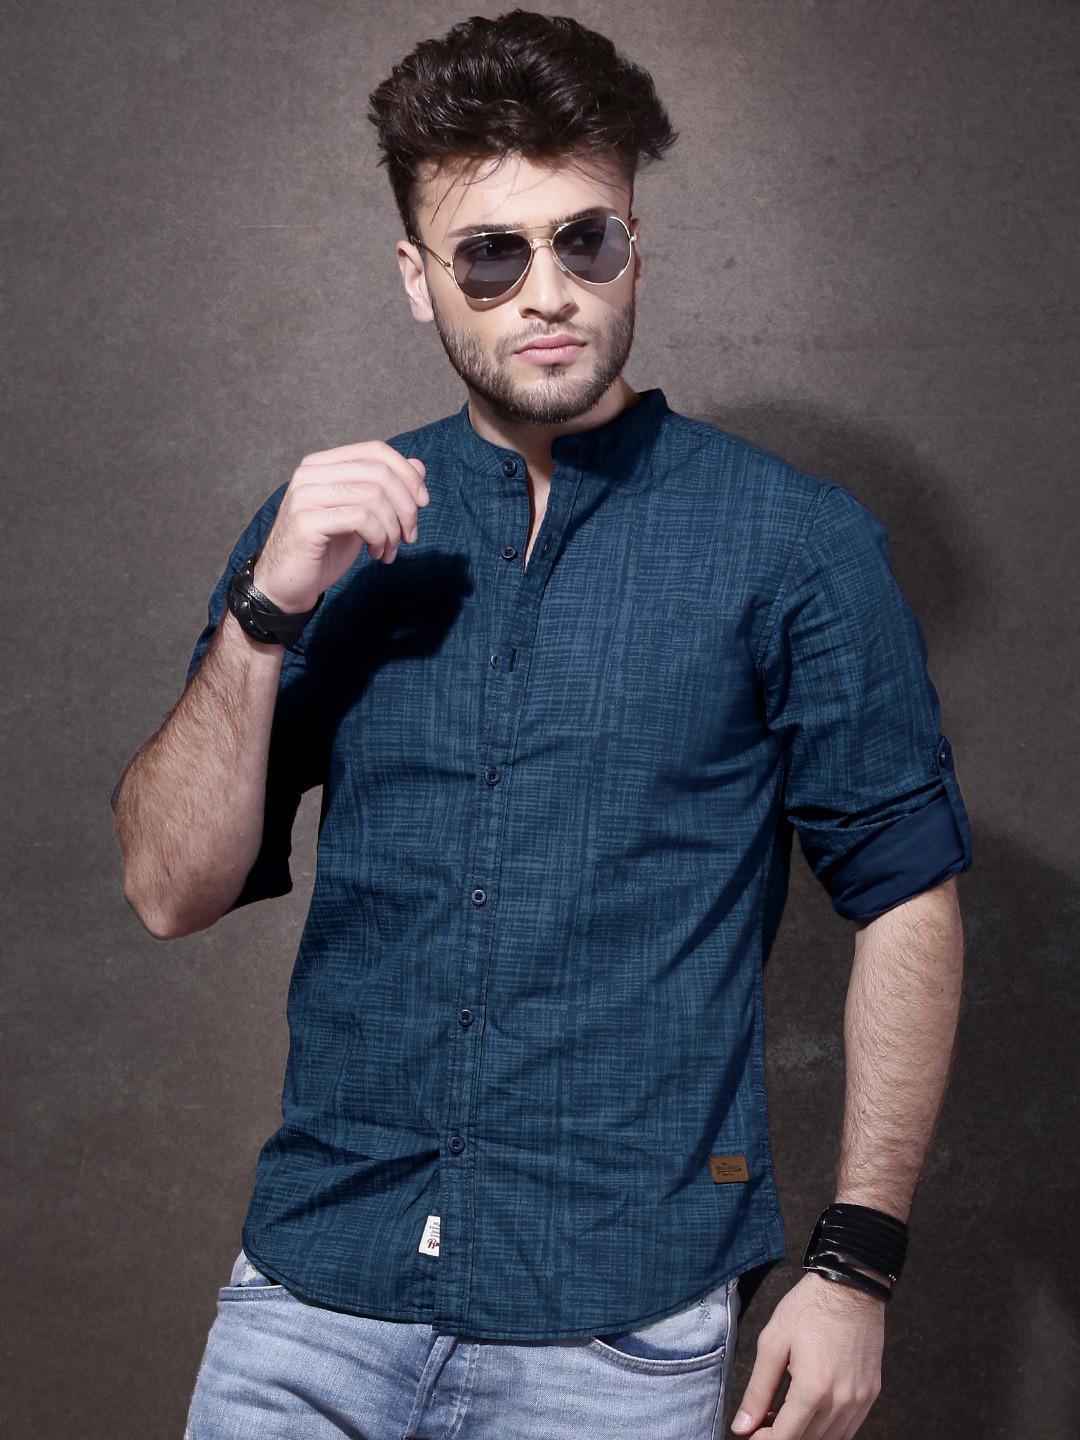


--- Similar Items ---

Product: Roadster Men Blue Regular Fit Printed Casual Shirt
Fabric: Cotton 


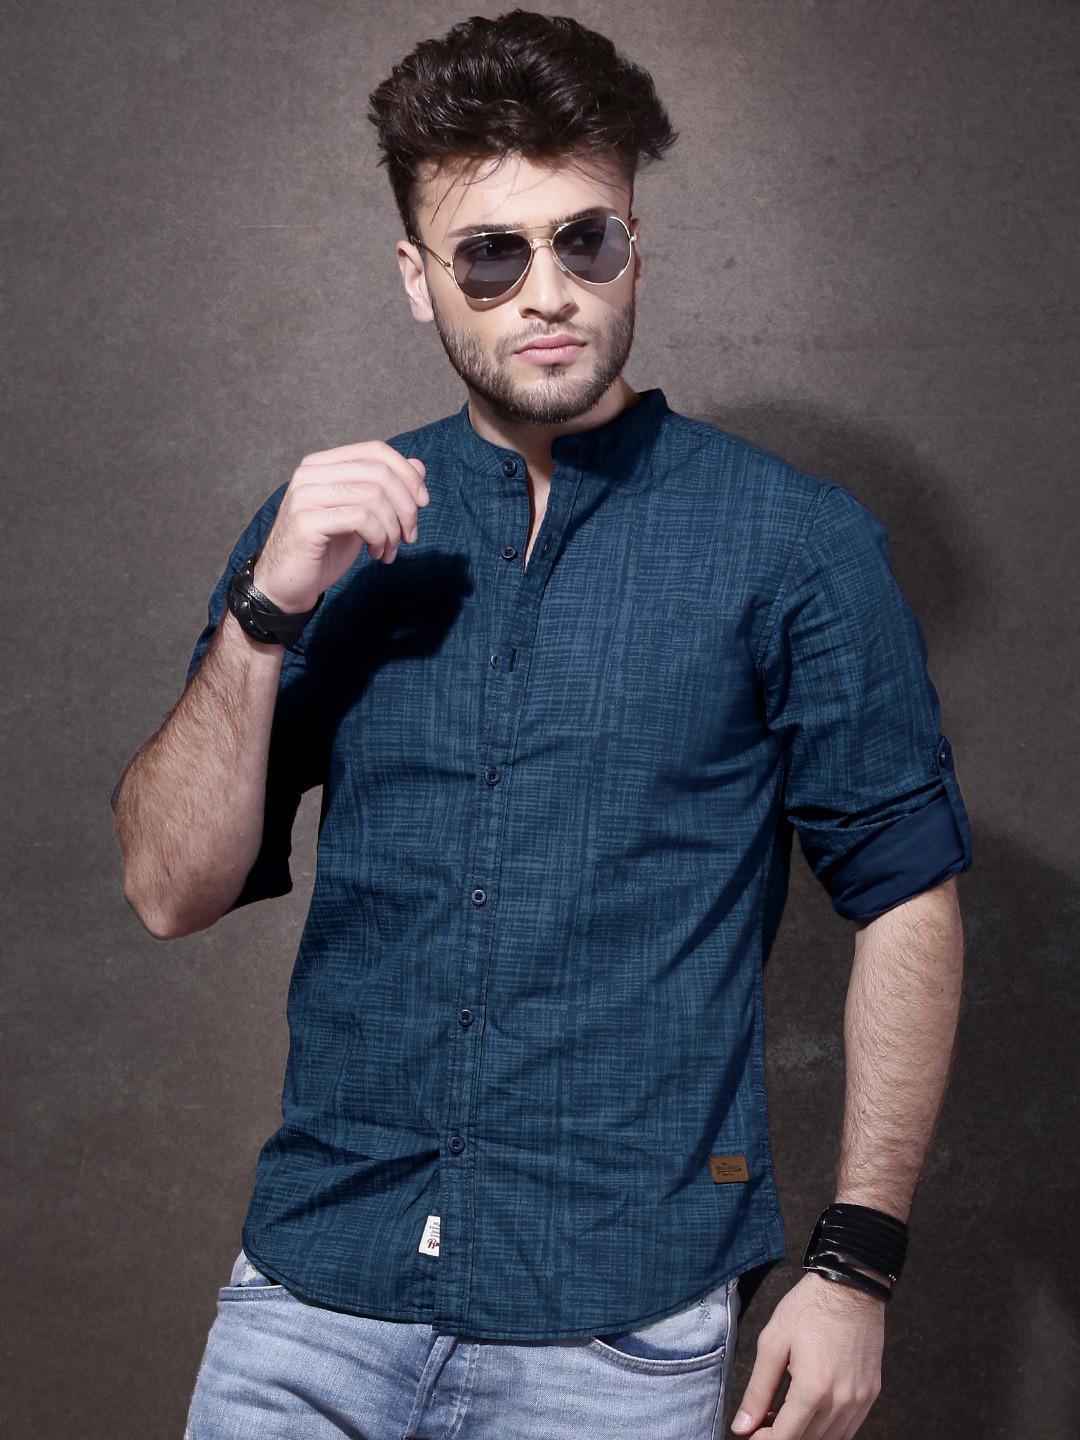


Product: Roadster Men Navy Regular Fit Solid Casual Shirt
Fabric: 100% cotton


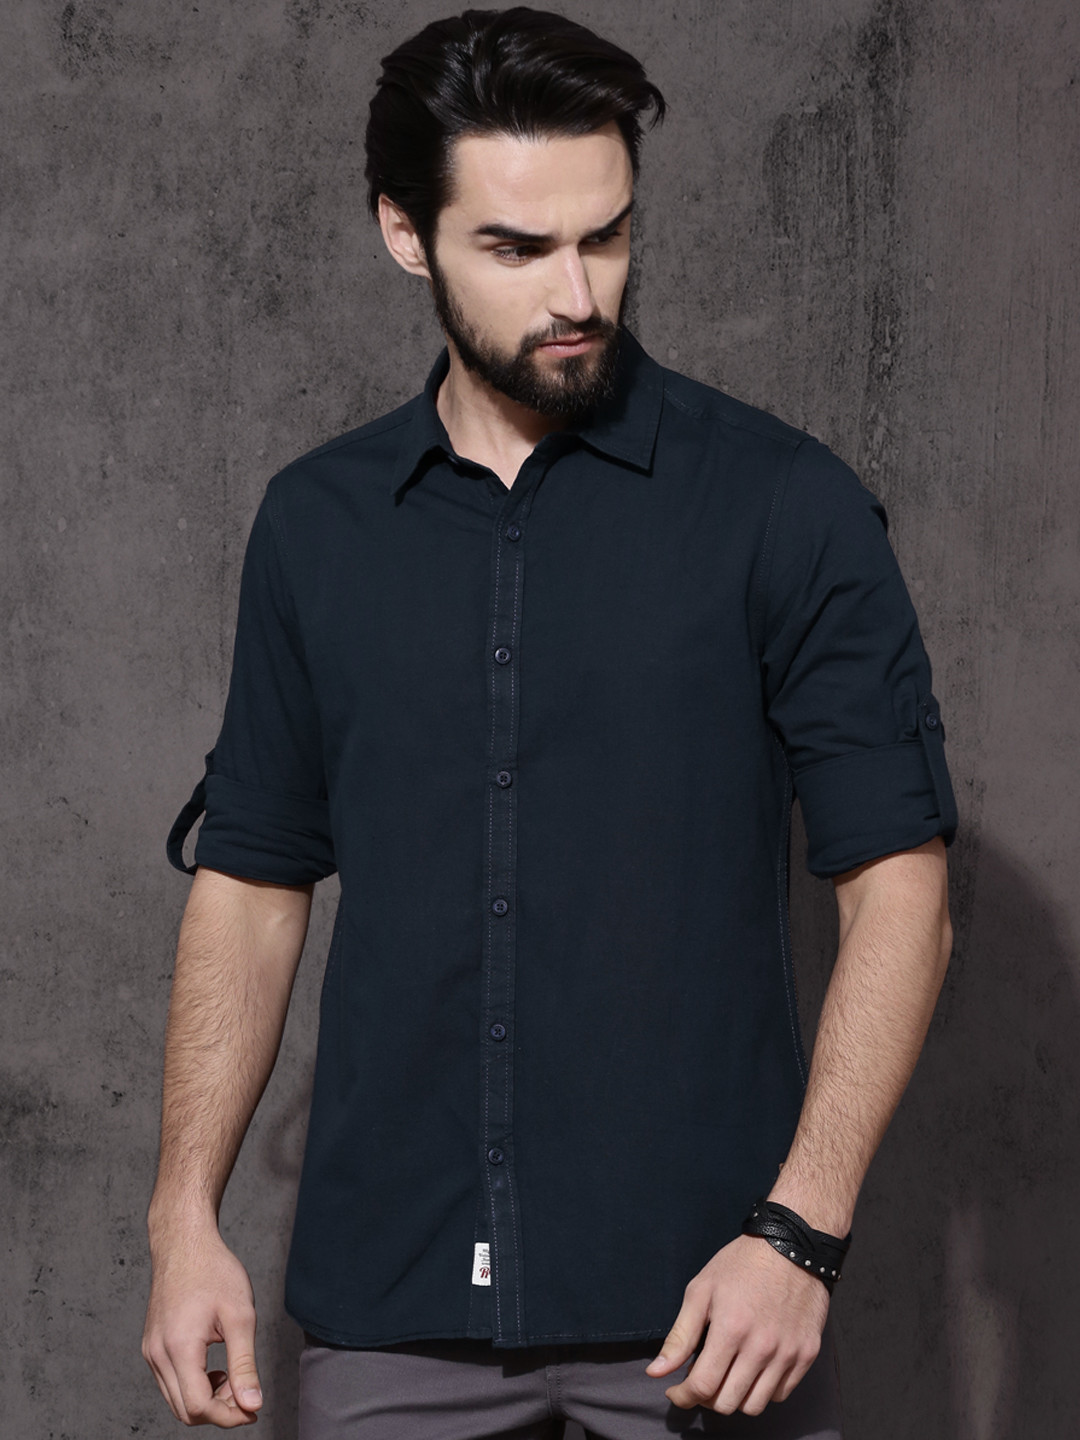


Product: HIGHLANDER Men Navy Blue Slim Fit Solid Casual Shirt
Fabric: Cotton 


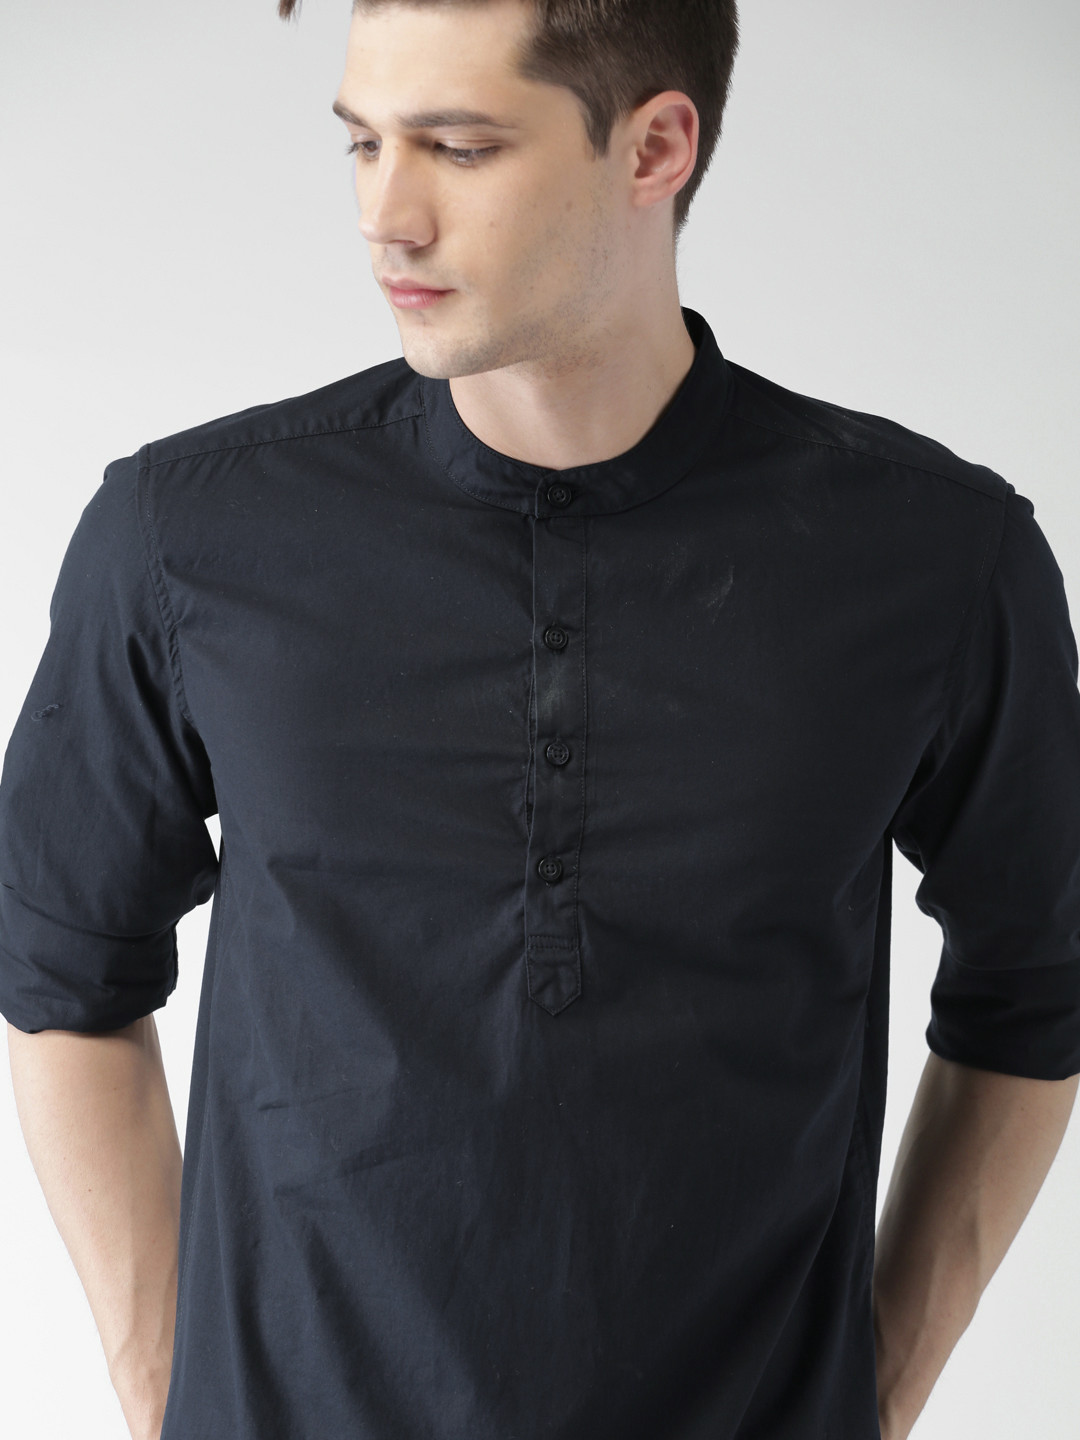


Product: WROGN Men Blue Slim Fit Striped Casual Shirt
Fabric: Cotton


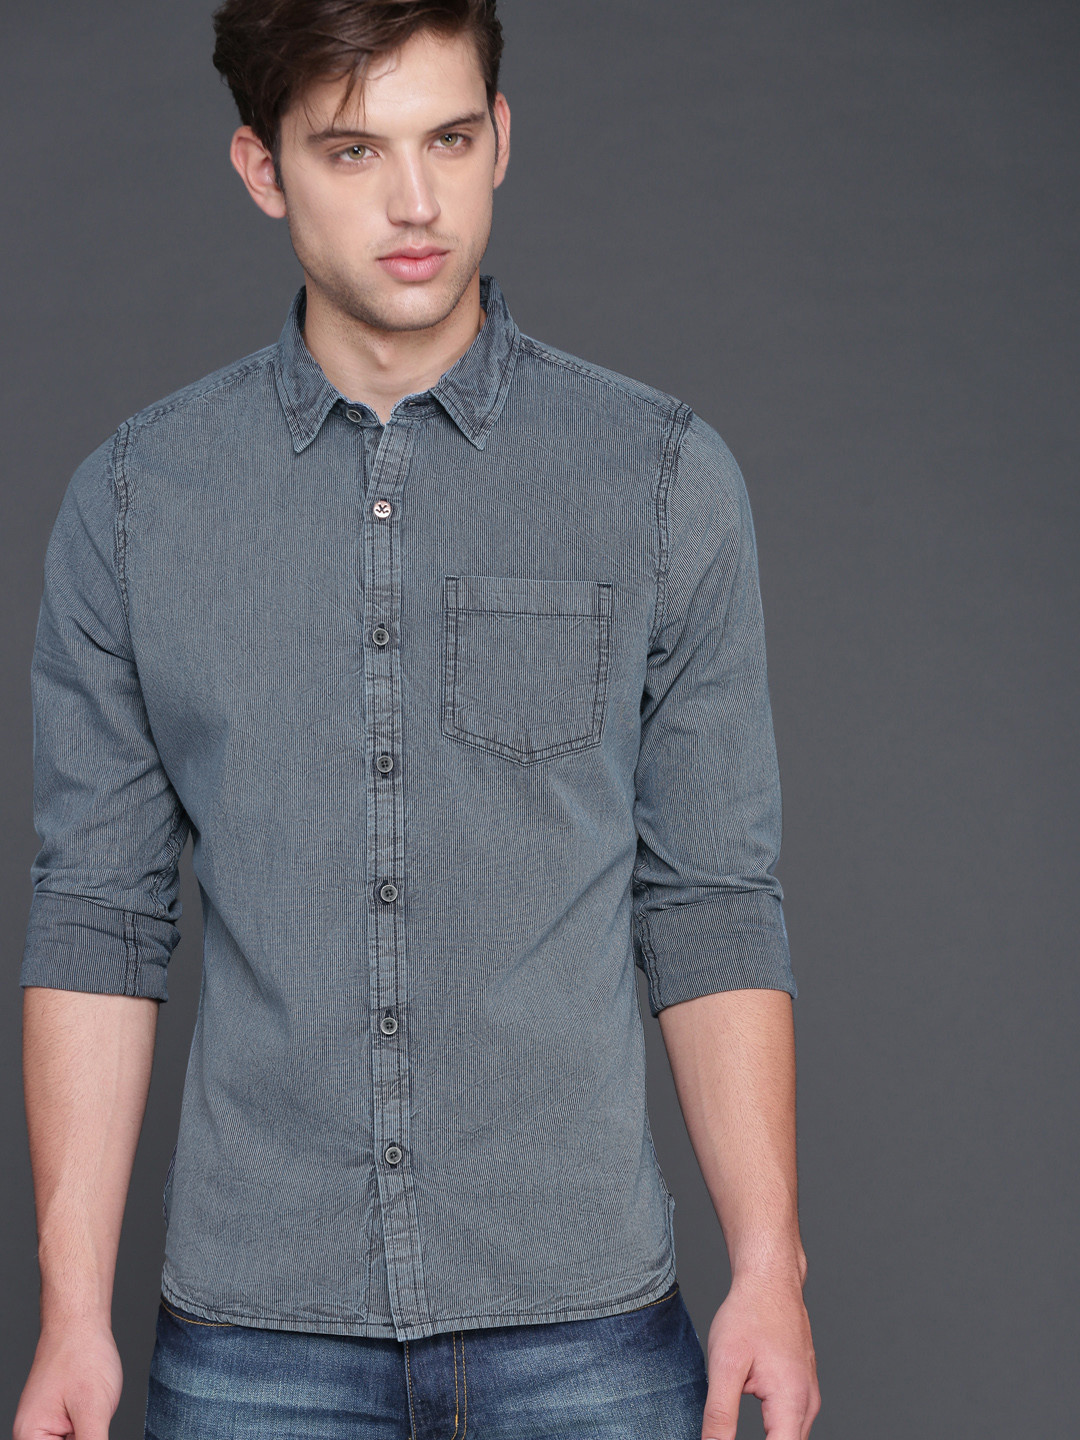


Product: HERE&NOW Men Grey Faded Denim Shirt
Fabric: 100% cotton


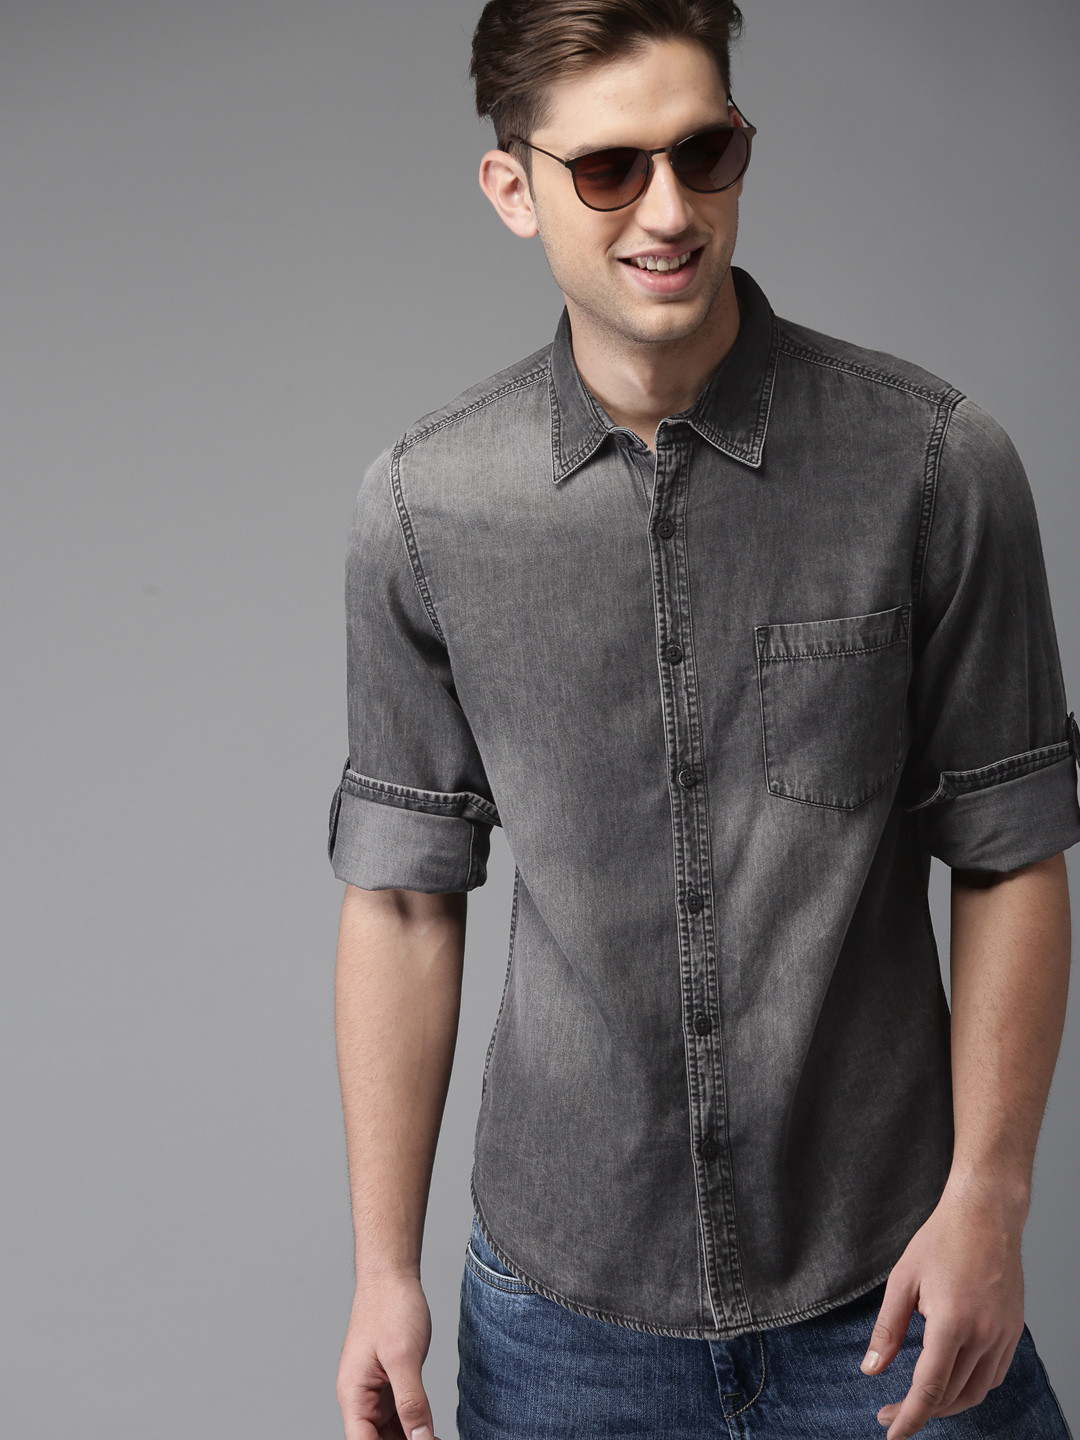


Product: Roadster Men Olive Green Regular Fit Solid Casual Shirt
Fabric: 100% cotton


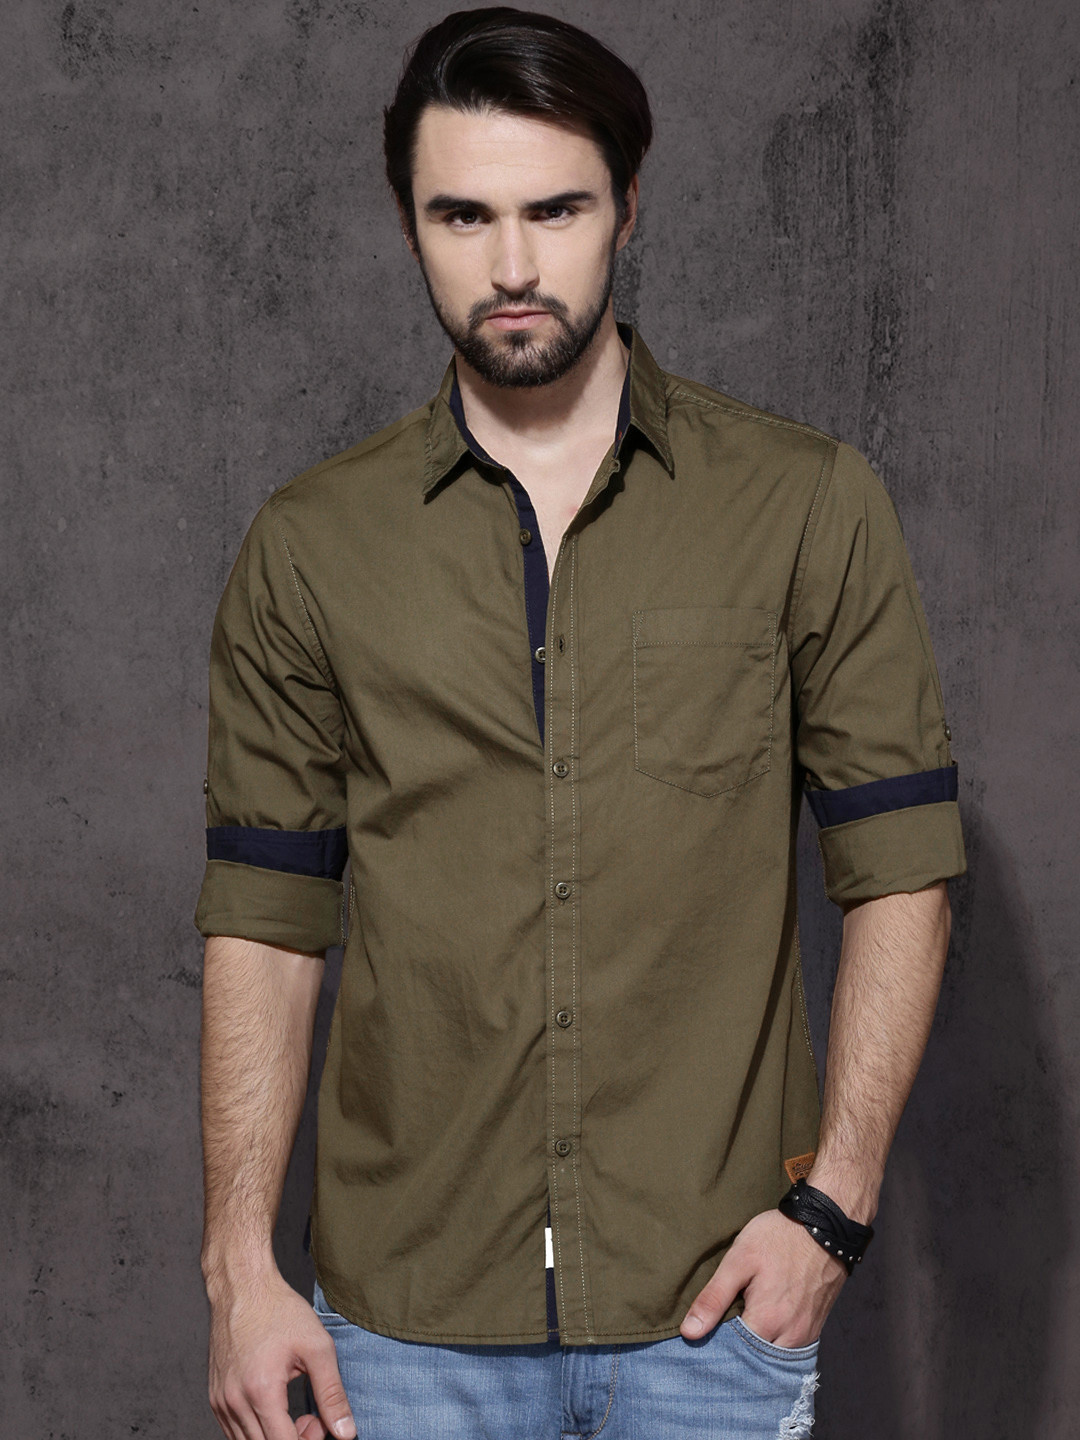


Product: Roadster Men Charcoal Regular Fit Solid Mandarin Collar Casual Shirt
Fabric: Cotton 


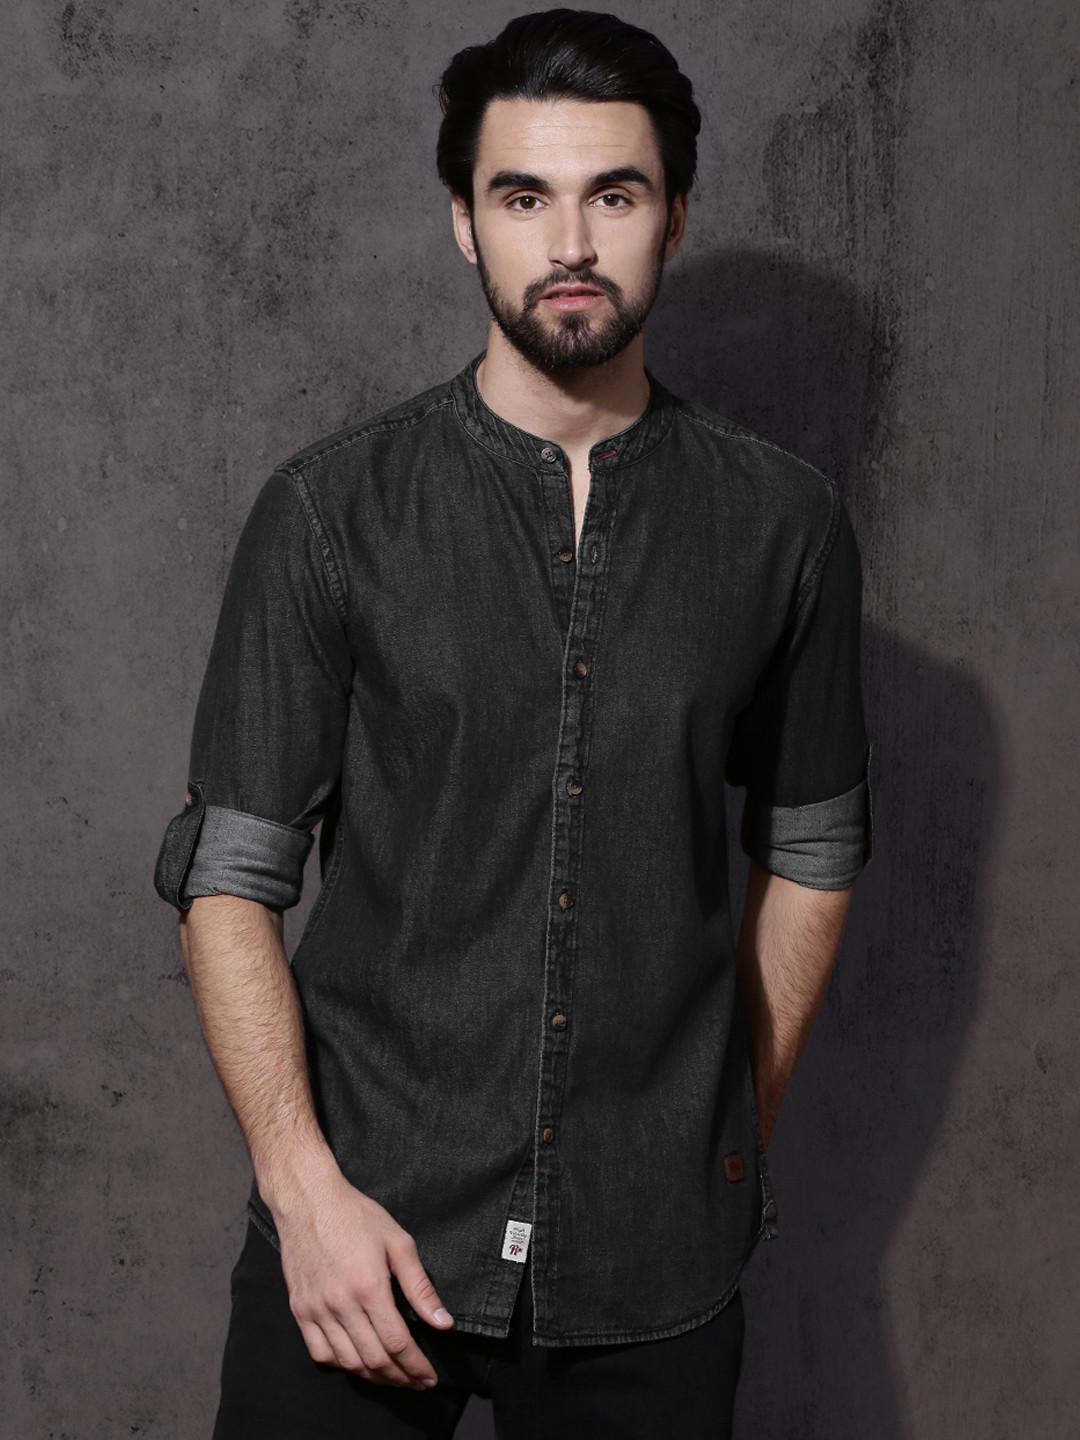


Product: WROGN Men Grey Slim Fit Solid Casual Shirt
Fabric: Cotton


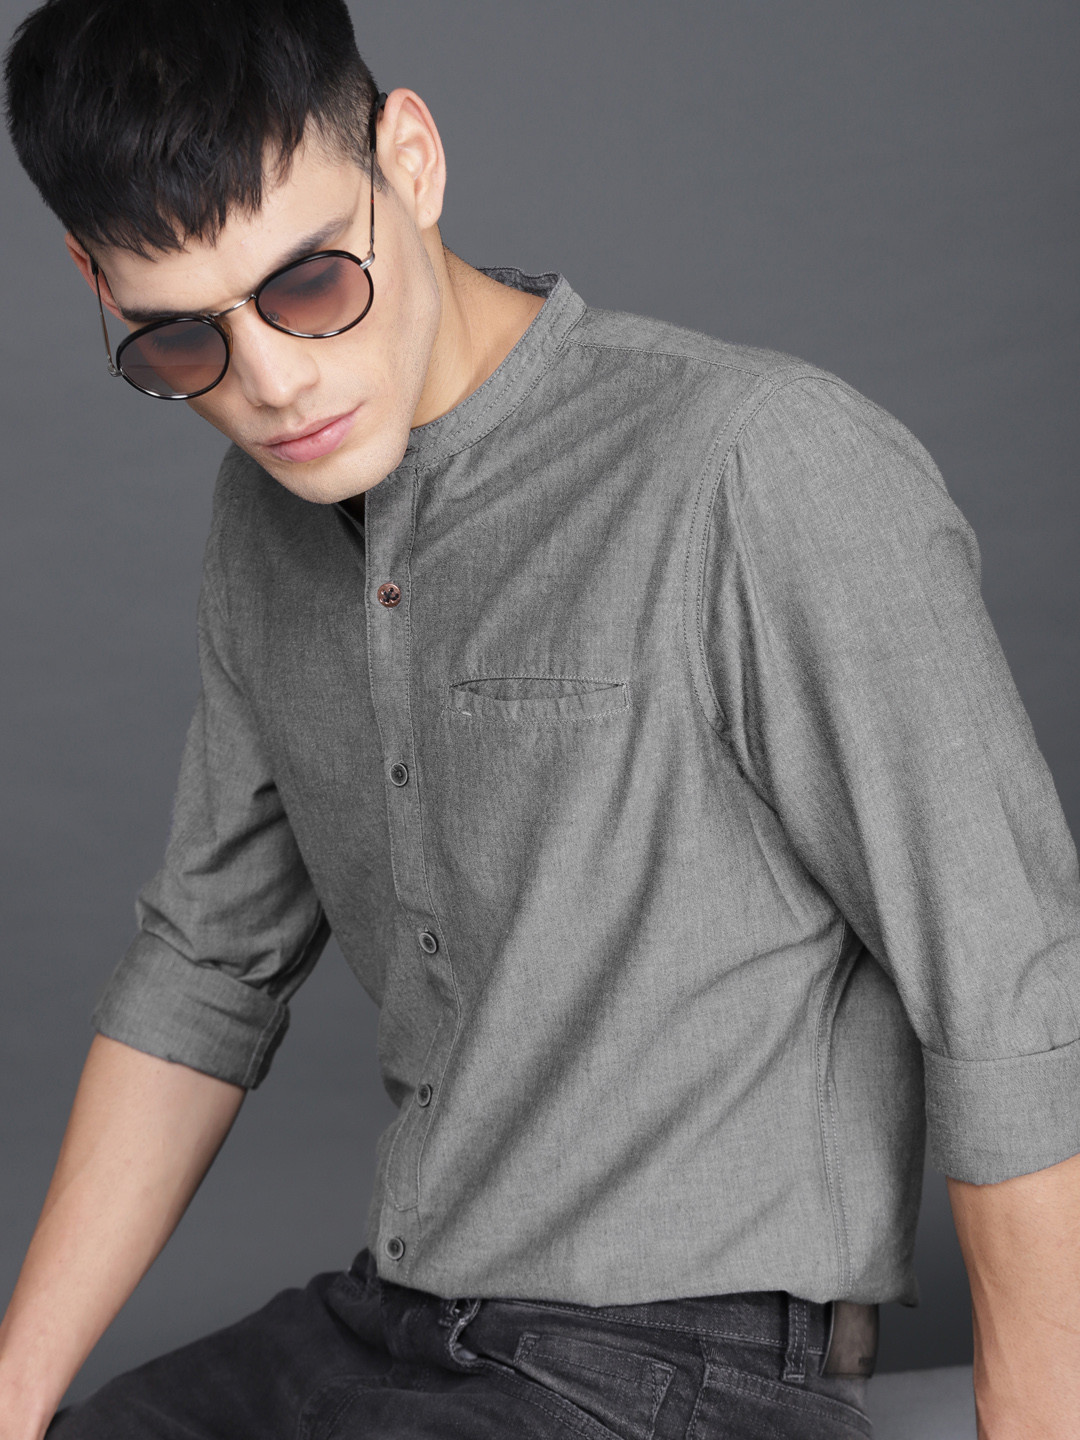


Product: Roadster Men Blue Regular Fit Solid Casual Shirt
Fabric: Cotton 


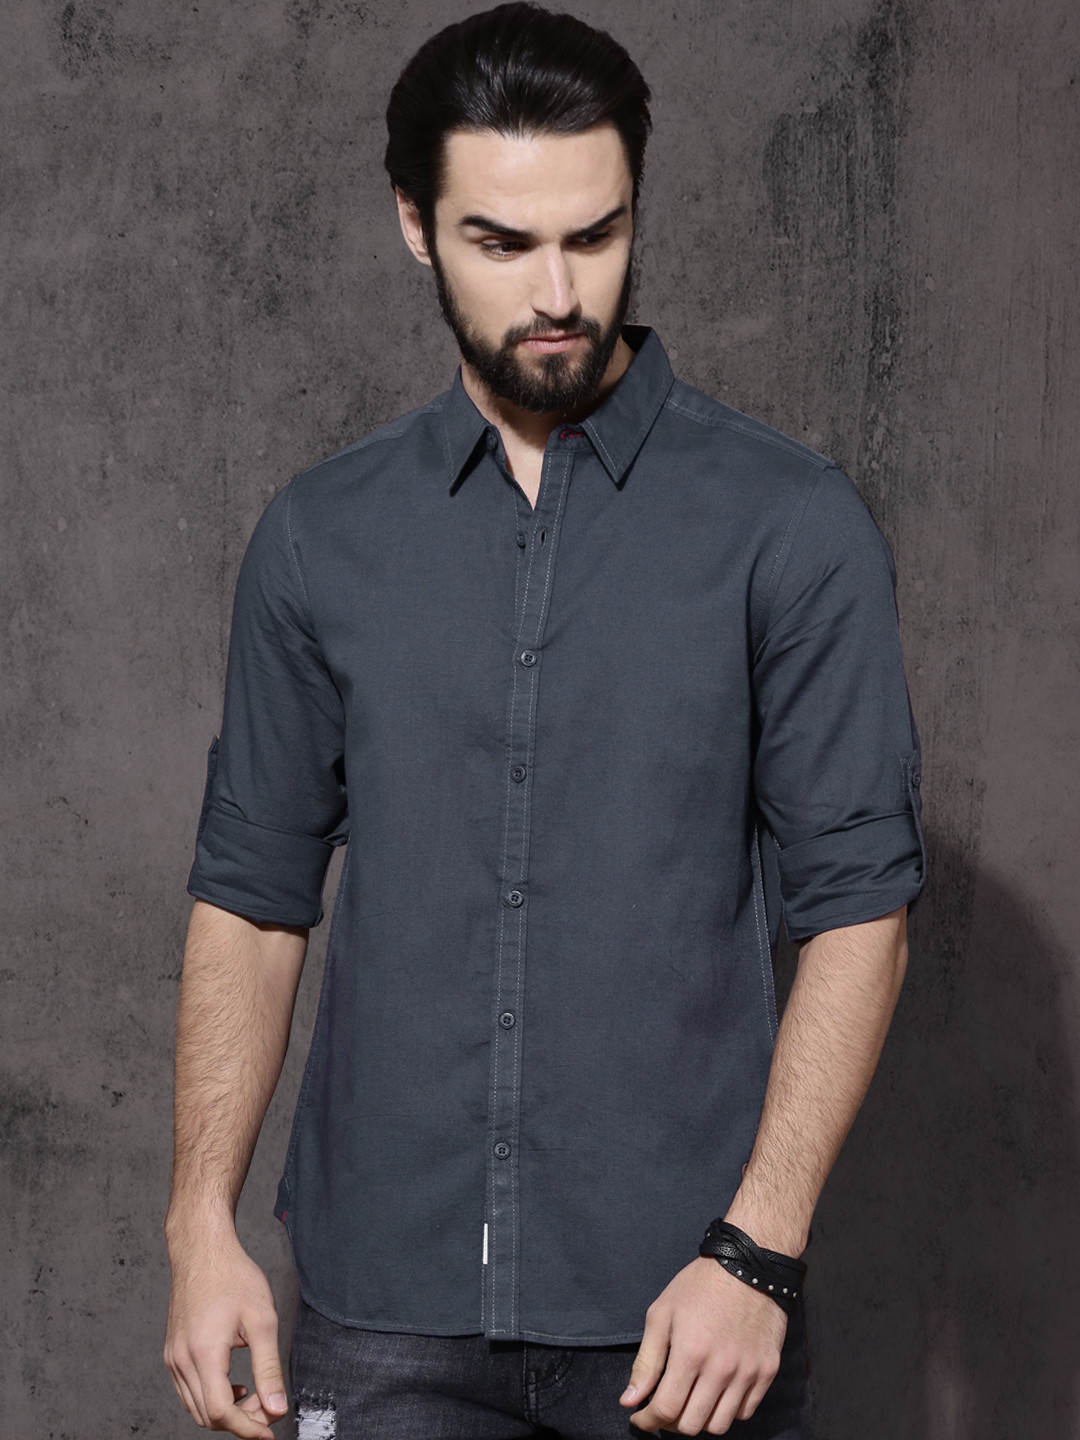


Product: HIGHLANDER Men Black Slim Fit Solid Casual Shirt
Fabric: Cotton 


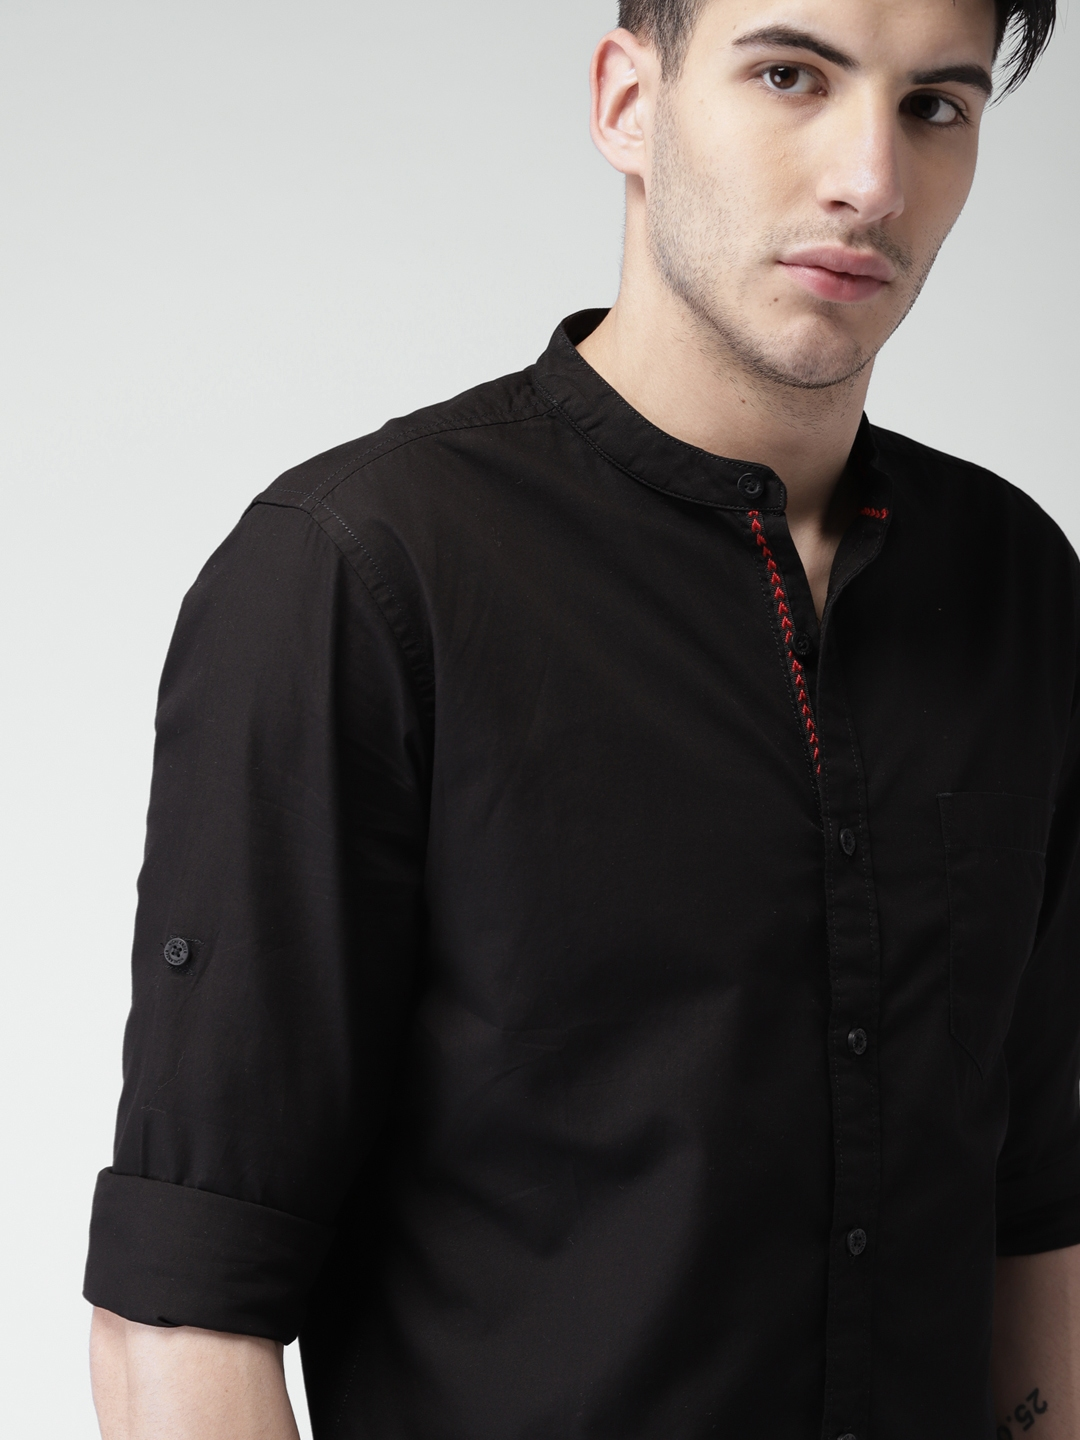

In [ ]:
from IPython.display import Image, display
import os

image_column_name = 'IMAGE'

# 1. Identify the row in the original DataFrame df that corresponds to the query_image_index.
# 2. Extract the image path, product name, and fabric for the query image from this row.
if query_image_index < len(df):
    query_image_row = df.iloc[query_image_index]
    query_image_path = query_image_row[image_column_name]
    query_product_name = query_image_row['NAME']
    query_fabric = query_image_row['FABRIC']

    # 3. Print a header indicating that this is the query image being displayed.
    print("--- Query Image ---")
    print(f"Product: {query_product_name}")
    print(f"Fabric: {query_fabric}")

    # 4. Use IPython.display.Image to display the query image using its extracted path.
    # 11. Handle potential errors or missing image paths during the display process
    if isinstance(query_image_path, str) and os.path.exists(query_image_path):
        display(Image(filename=query_image_path))
    else:
        print(f"Could not display query image. Path not found or invalid: {query_image_path}")

    # 6. Print a header indicating that the following images are the similar items found.
    print("\n--- Similar Items ---")

    # 7. Iterate through the similar_shirts_df DataFrame.
    if not similar_shirts_df.empty:
        for index, row in similar_shirts_df.iterrows():
            # 8. For each row in similar_shirts_df, extract the image path, product name, and fabric.
            similar_image_path = row[image_column_name]
            similar_product_name = row['NAME']
            similar_fabric = row['FABRIC']

            print(f"\nProduct: {similar_product_name}")
            print(f"Fabric: {similar_fabric}")

            # 9. Use IPython.display.Image to display the similar image using its extracted path.
            # 11. Handle potential errors or missing image paths during the display process
            if isinstance(similar_image_path, str) and os.path.exists(similar_image_path):
                display(Image(filename=similar_image_path))
            else:
                print(f"Could not display similar image. Path not found or invalid: {similar_image_path}")
    else:
        print("No similar items found to display.")

else:
    print(f"Query image index {query_image_index} is out of bounds for the DataFrame.")


In [ ]:
# requirements: torch, torchvision, faiss-cpu (or faiss-gpu)
import torch, torch.nn as nn, torch.nn.functional as F
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, Dataset
import faiss
import numpy as np

# ----- MODEL -----
class EmbeddingNet(nn.Module):
    def __init__(self, backbone_name="mobilenet_v2", emb_dim=128, pretrained=True):
        super().__init__()
        if backbone_name=="mobilenet_v2":
            base = models.mobilenet_v2(pretrained=pretrained).features
            self.base = base
            last_channels = 1280
        else:
            raise NotImplementedError
        # pooling + embedding head
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(last_channels, 512),
            nn.ReLU(),
            nn.Linear(512, emb_dim)
        )

    def forward(self, x):
        x = self.base(x)
        x = self.pool(x).view(x.size(0), -1)
        emb = self.fc(x)
        emb = F.normalize(emb, p=2, dim=1)   # unit length embeddings
        return emb

# optional pattern classifier head (multi-task)
class MultiTaskNet(nn.Module):
    def __init__(self, emb_net, num_patterns):
        super().__init__()
        self.emb_net = emb_net
        self.classifier = nn.Linear(emb_net.fc[-1].out_features if hasattr(emb_net, 'fc') else 128, num_patterns)
    def forward(self, x):
        emb = self.emb_net(x)
        logits = self.classifier(emb)   # use embeddings as features
        return emb, logits

# ----- TRIPLET MINER (BATCH-HARD) -----
def batch_hard_triplet_loss(embeddings, labels, margin=0.2):
    # embeddings: (B, D), labels: (B,)
    # compute pairwise distances
    pairwise = 2 - 2 * (embeddings @ embeddings.t())  # since embeddings normalized, dist^2 = 2-2cos
    batch_size = embeddings.size(0)
    loss = 0.0
    for i in range(batch_size):
        label = labels[i].item()
        pos_mask = (labels == label)
        neg_mask = (labels != label)
        # exclude self
        pos_mask[i] = False
        if pos_mask.sum() == 0:
            continue
        # hardest positive = max distance among positives
        hardest_pos = pairwise[i][pos_mask].max()
        # hardest negative = min distance among negatives
        hardest_neg = pairwise[i][neg_mask].min()
        loss += F.relu(hardest_pos - hardest_neg + margin)
    return loss / batch_size

# ----- TRANSFORMS -----
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4,0.4,0.4,0.1),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

# ----- DATASET -----
# You need a dataset that provides: image, product_id (or pattern label)
# For triplet mining we use product_id to define positives/negatives
class YourDataset(Dataset):
    def __init__(self, items, transform=None):
        # items: list of dicts {'image_path':..., 'product_id':..., 'pattern_label':...}
        self.items = items
        self.transform = transform
    def __len__(self): return len(self.items)
    def __getitem__(self, idx):
        item = self.items[idx]
        img = Image.open(item['image_path']).convert('RGB')
        if self.transform: img = self.transform(img)
        return img, item['product_id'], item.get('pattern_label', -1)

# ----- TRAIN LOOP -----
device = "cuda" if torch.cuda.is_available() else "cpu"
emb_net = EmbeddingNet().to(device)
# multi task:
# model = MultiTaskNet(emb_net, num_patterns).to(device)
optimizer = torch.optim.AdamW(emb_net.parameters(), lr=1e-4, weight_decay=1e-5)

dataloader = DataLoader(YourDataset(train_items, transform=transform), batch_size=32, shuffle=True, num_workers=4, drop_last=True)

for epoch in range(1, 18):
    emb_net.train()
    total_loss=0
    for imgs, prod_ids, patt in dataloader:
        imgs = imgs.to(device)
        prod_ids = prod_ids.to(device)
        embs = emb_net(imgs)            # (B,128)
        loss_trip = batch_hard_triplet_loss(embs, prod_ids, margin=0.2)
        # if using pattern classifier:
        # embs, logits = model(imgs)
        # loss_cls = F.cross_entropy(logits, patt)
        # loss = loss_trip + 0.5 * loss_cls
        loss = loss_trip
        optimizer.zero_grad(); loss.backward(); optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch} loss {total_loss/len(dataloader):.4f}")

# ----- BUILD EMBEDDING DATABASE -----
# compute embeddings for all dataset images and store mapping
emb_net.eval()
all_embs = []
all_ids = []
batch_loader = DataLoader(YourDataset(all_items, transform=eval_transform), batch_size=128, num_workers=4)
with torch.no_grad():
    for imgs, prod_ids, _ in batch_loader:
        imgs = imgs.to(device)
        e = emb_net(imgs).cpu().numpy()
        all_embs.append(e)
        all_ids.extend(prod_ids.numpy().tolist())
all_embs = np.vstack(all_embs).astype('float32')

# ----- INDEX WITH FAISS (Cosine via inner product after normalization) -----
faiss.normalize_L2(all_embs)   # ensure unit length
d = all_embs.shape[1]
index = faiss.IndexHNSWFlat(d, 32)  # fast and accurate
index.hnsw.efConstruction = 200
index.add(all_embs)

# ----- QUERY -----
def query_image_topk(img_path, k=5):
    img = eval_transform(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)
    with torch.no_grad():
        q = emb_net(img).cpu().numpy().astype('float32')
    faiss.normalize_L2(q)
    D, I = index.search(q, k)
    # I are indices into all_embs / all_ids arrays
    return [(all_ids[i], float(D[0][j])) for j,i in enumerate(I[0])]

# example:
print(query_image_topk("/path/to/query.jpg", k=5))


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 28.5MB/s]


NameError: name 'train_items' is not defined

In [ ]:
pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 65.4 MB/s eta 0:00:00


In [ ]:
pip install faiss-gpu


ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


In [ ]:
!pip install faiss-cpu
import faiss


In [ ]:
# COMPLETE RUN-READY PIPELINE (no-faiss)
# requirements: torch, torchvision, scikit-learn, pillow, tqdm
# In Colab, run: !pip install -q torch torchvision scikit-learn pillow tqdm

import os, glob, math, random, time
from PIL import Image
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# ----------------------------
# USER PARAMETERS (change if desired)
# ----------------------------
IMAGES_DIR = "/content/drive/MyDrive/shirt_images_permanent"  # <--- your folder
IMG_EXT = ("*.jpg","*.jpeg","*.png","*.bmp")
INITIAL_FEAT_BATCH = 128    # features extraction batch
NUM_CLUSTERS = 800          # pseudo-label clusters (try 300-1500 depending on dataset variety)
EMBED_DIM = 128
BATCH_SIZE = 32
EPOCHS = 12
LEARNING_RATE = 1e-4
MARGIN = 0.2
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_SEED = 42
TOP_K = 5
# ----------------------------

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# ----------------------------
# 1) Load image paths from folder
# ----------------------------
assert os.path.exists(IMAGES_DIR), f"Images folder not found: {IMAGES_DIR}"
all_paths = []
for ext in IMG_EXT:
    all_paths.extend(glob.glob(os.path.join(IMAGES_DIR, ext)))
all_paths = sorted(list(set(all_paths)))
print("Found images:", len(all_paths))
if len(all_paths) == 0:
    raise SystemExit("No images found - check IMAGES_DIR and extensions.")

# ----------------------------
# 2) Transforms
# ----------------------------
eval_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225]),
])

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4,0.4,0.4,0.1),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225]),
])

# ----------------------------
# 3) Quick feature extractor (pretrained backbone) to get initial features for clustering
# ----------------------------
print("Loading pretrained backbone for initial features...")
backbone = models.mobilenet_v2(pretrained=True).features  # fast, small
backbone.eval().to(DEVICE)
pool = nn.AdaptiveAvgPool2d(1)

def extract_initial_features(paths, batch=INITIAL_FEAT_BATCH):
    feats = []
    with torch.no_grad():
        for i in tqdm(range(0, len(paths), batch), desc="Extract feats"):
            batch_paths = paths[i:i+batch]
            imgs = []
            for p in batch_paths:
                img = Image.open(p).convert('RGB')
                img = eval_transform(img)
                imgs.append(img)
            imgs_t = torch.stack(imgs, dim=0).to(DEVICE)
            f = backbone(imgs_t)
            f = pool(f).view(f.size(0), -1)   # (B, C)
            f = f.cpu().numpy()
            feats.append(f)
    feats = np.vstack(feats).astype('float32')
    return feats

print("Extracting initial backbone features (for clustering)...")
initial_feats = extract_initial_features(all_paths)
print("Initial feats shape:", initial_feats.shape)

# Optional: reduce dim with PCA for faster clustering (and remove noise)
pca_dim = min(256, initial_feats.shape[1])
print("Applying PCA ->", pca_dim)
pca = PCA(n_components=pca_dim, random_state=RANDOM_SEED)
initial_feats_pca = pca.fit_transform(initial_feats)

# ----------------------------
# 4) Clustering to create pseudo-labels
# ----------------------------
print("Clustering into pseudo-labels (MiniBatchKMeans)...")
k = NUM_CLUSTERS
mbk = MiniBatchKMeans(n_clusters=k, random_state=RANDOM_SEED, batch_size=1024, max_iter=200)
mbk.fit(initial_feats_pca)
pseudo_labels = mbk.labels_
print("Cluster counts example (first 10):", np.bincount(pseudo_labels)[:10])

# build items list: each item {'path', 'label'}
items = [{"image_path": p, "label": int(l)} for p,l in zip(all_paths, pseudo_labels)]

# Train/test split (we'll use all images when building final index, but training uses train_items)
split = int(0.9 * len(items))
train_items = items[:split]
val_items = items[split:]

# ----------------------------
# 5) Dataset class for training with labels from clustering
# ----------------------------
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class ShirtDataset(Dataset):
    def __init__(self, items, transform=None):
        self.items = items
        self.transform = transform
    def __len__(self):
        return len(self.items)
    def __getitem__(self, idx):
        it = self.items[idx]
        img = Image.open(it["image_path"]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        label = int(it["label"])
        return img, label

train_loader = DataLoader(ShirtDataset(train_items, transform=train_transform),
                          batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)
val_loader = DataLoader(ShirtDataset(val_items, transform=eval_transform),
                        batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# ----------------------------
# 6) Embedding network (small head on top of MobileNetV2)
# ----------------------------
class EmbeddingNet(nn.Module):
    def __init__(self, emb_dim=EMBED_DIM):
        super().__init__()
        base = models.mobilenet_v2(pretrained=True).features
        self.base = base
        self.pool = nn.AdaptiveAvgPool2d(1)
        last_ch = 1280
        self.fc = nn.Sequential(
            nn.Linear(last_ch, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, emb_dim)
        )
    def forward(self, x):
        x = self.base(x)
        x = self.pool(x).view(x.size(0), -1)
        x = self.fc(x)
        x = F.normalize(x, p=2, dim=1)
        return x

model = EmbeddingNet(emb_dim=EMBED_DIM).to(DEVICE)

# ----------------------------
# 7) Batch-hard triplet loss implementation
# ----------------------------
def batch_hard_triplet_loss(embeddings, labels, margin=MARGIN):
    # embeddings: (B, D), labels: (B,)
    # we will compute pairwise distances via cosine (since normalized)
    # dist^2 = 2 - 2 * cos -> but we can use 1 - cosine for ranking as well
    batch_size = embeddings.size(0)
    # pairwise cosine similarity
    sim = embeddings @ embeddings.t()   # (B,B)
    # convert to distances where higher = worse (we want hardest pos = min sim among positives)
    # However for triplet margin (pos < neg - margin) we will compute using similarity:
    loss = 0.0
    count = 0
    for i in range(batch_size):
        label = labels[i].item()
        mask_pos = (labels == label)
        mask_neg = (labels != label)
        mask_pos[i] = False  # exclude self
        if mask_pos.sum() == 0:
            continue
        pos_sims = sim[i][mask_pos]
        neg_sims = sim[i][mask_neg]
        hardest_pos_sim = pos_sims.min()   # smallest cosine (hardest positive)
        hardest_neg_sim = neg_sims.max()   # largest cosine (hardest negative)
        # want pos_sim > neg_sim - margin? For cosine, higher => more similar.
        # triplet loss (in terms of similarity): max(0, hardest_neg - hardest_pos + margin')
        # convert margin to similarity scale: we can use same margin but it's heuristic.
        trip = F.relu(hardest_neg_sim - hardest_pos_sim + margin)
        loss += trip
        count += 1
    if count == 0:
        return torch.tensor(0.0, device=embeddings.device, requires_grad=True)
    return loss / count

# ----------------------------
# 8) Training loop (fast options: freeze early layers, use amp)
# ----------------------------
opt = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE=="cuda"))

# Freeze backbone initial layers for first few epochs to speed up
def set_freeze(model, freeze=True, freeze_until_layer=6):
    # simple heuristic: freeze first N child modules of base
    i = 0
    for child in model.base.children():
        if i < freeze_until_layer and freeze:
            for p in child.parameters(): p.requires_grad = False
        else:
            for p in child.parameters(): p.requires_grad = True
        i += 1

set_freeze(model, freeze=True, freeze_until_layer=6)

print("Starting training on device:", DEVICE)
for epoch in range(1, EPOCHS+1):
    model.train()
    if epoch == 4:
        # unfreeze after a few epochs
        set_freeze(model, freeze=False)
    running_loss = 0.0
    batches = 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}"):
        imgs = imgs.to(DEVICE)
        labels = labels.to(DEVICE)
        with torch.cuda.amp.autocast(enabled=(DEVICE=="cuda")):
            embs = model(imgs)
            loss = batch_hard_triplet_loss(embs, labels, margin=MARGIN)
        opt.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(opt)
        scaler.update()
        running_loss += loss.item()
        batches += 1
    avg = running_loss / max(1, batches)
    print(f"Epoch {epoch} avg loss: {avg:.4f}")

# ----------------------------
# 9) Build final embeddings for all images and index with sklearn NearestNeighbors
# ----------------------------
print("Computing final embeddings for all images...")
model.eval()
all_embs = []
paths_order = []
with torch.no_grad():
    for i in tqdm(range(0, len(all_paths), INITIAL_FEAT_BATCH), desc="Final embed"):
        batch_paths = all_paths[i:i+INITIAL_FEAT_BATCH]
        imgs = [eval_transform(Image.open(p).convert("RGB")) for p in batch_paths]
        imgs_t = torch.stack(imgs).to(DEVICE)
        e = model(imgs_t).cpu().numpy()
        all_embs.append(e)
        paths_order.extend(batch_paths)
all_embs = np.vstack(all_embs).astype('float32')
print("All embeddings shape:", all_embs.shape)

# Use cosine distance in NearestNeighbors (metric='cosine' gives distance in [0..2], lower is more similar)
nn_index = NearestNeighbors(n_neighbors=TOP_K, metric="cosine", algorithm="brute")
nn_index.fit(all_embs)   # for small/medium datasets brute is fine; for bigger use 'ball_tree' / 'auto'

# ----------------------------
# 10) Query function
# ----------------------------
def query_image_topk(query_path, k=TOP_K):
    qimg = eval_transform(Image.open(query_path).convert("RGB")).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        qemb = model(qimg).cpu().numpy()   # (1, D)
    dists, inds = nn_index.kneighbors(qemb, n_neighbors=k)
    # metric='cosine' returns distance; smaller == more similar
    results = []
    for dist, idx in zip(dists[0], inds[0]):
        results.append({"path": paths_order[idx], "score": float(1.0 - dist)})  # convert to similarity ~ 1-dist
    return results

# Example usage:
# query_res = query_image_topk("/content/some_query.jpg", k=5)
# for r in query_res: print(r)

# ----------------------------
# 11) Save embeddings and model for later use
# ----------------------------
import pickle
np.save("all_embeddings.npy", all_embs)
with open("paths_order.pkl","wb") as f:
    pickle.dump(paths_order, f)
torch.save(model.state_dict(), "embedding_model.pth")
print("Saved embeddings, paths_order.pkl, and model weights to current working dir.")

print("Done. Use query_image_topk(query_path, k=5) to fetch top-5 visually similar images.")


KeyboardInterrupt: 

In [ ]:
from torchvision import models
import torch

# Load pretrained weights (this downloads them)
model = models.mobilenet_v2(pretrained=True)

# Save weights locally to Google Drive (so you can use offline)
torch.save(model.state_dict(), "/content/drive/MyDrive/mobilenet_v2.pth")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
from torchvision import models
import torch

# Load model structure
model = models.mobilenet_v2(weights=None)  # no internet needed

# Load pretrained weights from your saved file
weights_path = "/content/drive/MyDrive/mobilenet_v2.pth"
state_dict = torch.load(weights_path, map_location="cpu")
model.load_state_dict(state_dict)

# Use model.features as backbone
backbone = model.features


In [ ]:
backbone = models.mobilenet_v2(pretrained=True).features


In [ ]:
# Offline-safe version
backbone = models.mobilenet_v2(weights=None).features
state_dict = torch.load("/content/drive/MyDrive/mobilenet_v2.pth", map_location="cpu")
full_model = models.mobilenet_v2(weights=None)
full_model.load_state_dict(state_dict)
backbone = full_model.features


In [ ]:
backbone = models.mobilenet_v2(weights=None).features


In [ ]:
import torch
from torchvision import models

model = models.mobilenet_v2(weights=None)  # offline-safe
state_dict = torch.load("/content/drive/MyDrive/mobilenet_v2.pth", map_location="cpu")
model.load_state_dict(state_dict)
backbone = model.features


In [ ]:
# ----------------------------
# OFFLINE TRIPLET NETWORK FOR SHIRT IMAGES
# ----------------------------

import os, glob, random
from PIL import Image, ImageFile
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# ----------------------------
# USER PARAMETERS
# ----------------------------
IMAGES_DIR = "/content/drive/MyDrive/shirt_images_permanent"
WEIGHTS_PATH = "/content/drive/MyDrive/mobilenet_v2.pth"  # local offline weights
IMG_EXT = ("*.jpg","*.jpeg","*.png")
BATCH_SIZE = 32
INITIAL_FEAT_BATCH = 128
NUM_CLUSTERS = 800
EMBED_DIM = 128
EPOCHS = 12
LEARNING_RATE = 1e-4
MARGIN = 0.2
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
TOP_K = 5

# ----------------------------
# SET SEEDS
# ----------------------------
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# ----------------------------
# 1) Load all image paths
# ----------------------------
ImageFile.LOAD_TRUNCATED_IMAGES = True
all_paths = []
for ext in IMG_EXT:
    all_paths.extend(glob.glob(os.path.join(IMAGES_DIR, ext)))
all_paths = sorted(list(set(all_paths)))
print("Found images:", len(all_paths))
if len(all_paths)==0:
    raise SystemExit("No images found in folder.")

# ----------------------------
# 2) Transforms
# ----------------------------
eval_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.7,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.4,0.4,0.4,0.1),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# ----------------------------
# 3) Offline MobileNetV2 backbone
# ----------------------------
print("Loading offline MobileNetV2 weights...")
model_full = models.mobilenet_v2(weights=None)
state_dict = torch.load(WEIGHTS_PATH, map_location=DEVICE)
model_full.load_state_dict(state_dict)
backbone = model_full.features.to(DEVICE)
backbone.eval()

# ----------------------------
# 4) Extract initial features for clustering
# ----------------------------
pool = nn.AdaptiveAvgPool2d(1)
def extract_initial_features(paths, batch=INITIAL_FEAT_BATCH):
    feats = []
    with torch.no_grad():
        for i in tqdm(range(0, len(paths), batch)):
            batch_paths = paths[i:i+batch]
            imgs = []
            for p in batch_paths:
                img = Image.open(p).convert("RGB")
                img = eval_transform(img)
                imgs.append(img)
            imgs_t = torch.stack(imgs, dim=0).to(DEVICE)
            f = backbone(imgs_t)
            f = pool(f).view(f.size(0), -1)
            feats.append(f.cpu().numpy())
    return np.vstack(feats).astype('float32')

print("Extracting initial features for clustering...")
initial_feats = extract_initial_features(all_paths)

# Optional PCA for clustering speed
pca_dim = min(256, initial_feats.shape[1])
pca = PCA(n_components=pca_dim, random_state=42)
initial_feats_pca = pca.fit_transform(initial_feats)

# ----------------------------
# 5) Clustering -> pseudo-labels
# ----------------------------
print("Clustering images to pseudo-labels...")
mbk = MiniBatchKMeans(n_clusters=NUM_CLUSTERS, batch_size=1024, max_iter=200, random_state=42)
mbk.fit(initial_feats_pca)
pseudo_labels = mbk.labels_
items = [{"image_path":p, "label":int(l)} for p,l in zip(all_paths, pseudo_labels)]

# Train/test split (optional)
split = int(0.9*len(items))
train_items = items[:split]
val_items = items[split:]

# ----------------------------
# 6) Dataset class
# ----------------------------
class ShirtDataset(Dataset):
    def __init__(self, items, transform=None):
        self.items = items
        self.transform = transform
    def __len__(self):
        return len(self.items)
    def __getitem__(self, idx):
        it = self.items[idx]
        img = Image.open(it["image_path"]).convert("RGB")
        if self.transform: img = self.transform(img)
        label = int(it["label"])
        return img, label

train_loader = DataLoader(ShirtDataset(train_items, train_transform), batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=4)
val_loader = DataLoader(ShirtDataset(val_items, eval_transform), batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

# ----------------------------
# 7) Embedding network
# ----------------------------
class EmbeddingNet(nn.Module):
    def __init__(self, emb_dim=EMBED_DIM):
        super().__init__()
        base = models.mobilenet_v2(weights=None).features
        self.base = base
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(1280,512),
            nn.ReLU(inplace=True),
            nn.Linear(512, emb_dim)
        )
    def forward(self,x):
        x = self.base(x)
        x = self.pool(x).view(x.size(0),-1)
        x = self.fc(x)
        x = F.normalize(x, p=2, dim=1)
        return x

model = EmbeddingNet(emb_dim=EMBED_DIM).to(DEVICE)

# Load offline backbone weights into embedding network
state_dict = torch.load(WEIGHTS_PATH, map_location=DEVICE)
model.base.load_state_dict(state_dict, strict=False)

# ----------------------------
# 8) Batch-hard triplet loss
# ----------------------------
def batch_hard_triplet_loss(embeddings, labels, margin=MARGIN):
    batch_size = embeddings.size(0)
    sim = embeddings @ embeddings.t()
    loss = 0.0
    count = 0
    for i in range(batch_size):
        label = labels[i].item()
        mask_pos = (labels==label)
        mask_neg = (labels!=label)
        mask_pos[i] = False
        if mask_pos.sum()==0:
            continue
        hardest_pos = sim[i][mask_pos].min()
        hardest_neg = sim[i][mask_neg].max()
        trip = F.relu(hardest_neg - hardest_pos + margin)
        loss += trip
        count += 1
    return loss / count if count>0 else torch.tensor(0.0, device=DEVICE, requires_grad=True)

# ----------------------------
# 9) Training loop
# ----------------------------
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)
scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE=="cuda"))

print("Training embedding network offline...")
for epoch in range(1, EPOCHS+1):
    model.train()
    running_loss = 0.0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}"):
        imgs = imgs.to(DEVICE)
        labels = labels.to(DEVICE)
        with torch.cuda.amp.autocast(enabled=(DEVICE=="cuda")):
            embs = model(imgs)
            loss = batch_hard_triplet_loss(embs, labels)
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        running_loss += loss.item()
    print(f"Epoch {epoch} avg loss: {running_loss/len(train_loader):.4f}")

# ----------------------------
# 10) Build final embeddings for all images
# ----------------------------
print("Computing final embeddings for nearest-neighbor search...")
model.eval()
all_embs = []
paths_order = []
with torch.no_grad():
    for i in tqdm(range(0, len(all_paths), INITIAL_FEAT_BATCH)):
        batch_paths = all_paths[i:i+INITIAL_FEAT_BATCH]
        imgs = [eval_transform(Image.open(p).convert("RGB")) for p in batch_paths]
        imgs_t = torch.stack(imgs).to(DEVICE)
        e = model(imgs_t).cpu().numpy()
        all_embs.append(e)
        paths_order.extend(batch_paths)
all_embs = np.vstack(all_embs).astype('float32')

# ----------------------------
# 11) Build NearestNeighbors index
# ----------------------------
nn_index = NearestNeighbors(n_neighbors=TOP_K, metric='cosine', algorithm='brute')
nn_index.fit(all_embs)

# ----------------------------
# 12) Query function
# ----------------------------
def query_image_topk(img_path, k=TOP_K):
    model.eval()
    img = eval_transform(Image.open(img_path).convert("RGB")).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        emb = model(img).cpu().numpy()
    dists, idxs = nn_index.kneighbors(emb, n_neighbors=k)
    results = [(paths_order[i], float(dists[0][j])) for j,i in enumerate(idxs[0])]
    return results

# ----------------------------
# 13) Example query
# ----------------------------
query_path = "/content/drive/MyDrive/shirt_images_permanent/1027224.jpg"
results = query_image_topk(query_path, k=TOP_K)
print("Top-K visually similar shirts:")
for r in results:
    print(r[0], "Distance:", r[1])


Found images: 3864
Loading offline MobileNetV2 weights...
Extracting initial features for clustering...


100%|██████████| 31/31 [09:52<00:00, 19.10s/it]


Clustering images to pseudo-labels...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/tmp/ipython-input-3416065820.py:195: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE=="cuda"))


Training embedding network offline...


Epoch 1:   0%|          | 0/108 [00:00<?, ?it/s]/tmp/ipython-input-3416065820.py:204: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(DEVICE=="cuda")):
Epoch 1: 100%|██████████| 108/108 [08:06<00:00,  4.50s/it]


Epoch 1 avg loss: 0.1686


Epoch 2: 100%|██████████| 108/108 [08:22<00:00,  4.65s/it]


Epoch 2 avg loss: 0.1837


Epoch 3: 100%|██████████| 108/108 [08:19<00:00,  4.62s/it]


Epoch 3 avg loss: 0.1725


Epoch 4: 100%|██████████| 108/108 [08:24<00:00,  4.67s/it]


Epoch 4 avg loss: 0.1798


Epoch 5: 100%|██████████| 108/108 [08:04<00:00,  4.49s/it]


Epoch 5 avg loss: 0.1835


Epoch 6: 100%|██████████| 108/108 [09:08<00:00,  5.08s/it]


Epoch 6 avg loss: 0.1816


Epoch 7: 100%|██████████| 108/108 [08:49<00:00,  4.90s/it]


Epoch 7 avg loss: 0.1816


Epoch 8: 100%|██████████| 108/108 [08:29<00:00,  4.72s/it]


Epoch 8 avg loss: 0.1704


Epoch 9: 100%|██████████| 108/108 [08:25<00:00,  4.68s/it]


Epoch 9 avg loss: 0.1797


Epoch 10: 100%|██████████| 108/108 [08:16<00:00,  4.60s/it]


Epoch 10 avg loss: 0.1760


Epoch 11: 100%|██████████| 108/108 [09:07<00:00,  5.06s/it]


Epoch 11 avg loss: 0.1778


Epoch 12: 100%|██████████| 108/108 [08:45<00:00,  4.87s/it]


Epoch 12 avg loss: 0.1852
Computing final embeddings for nearest-neighbor search...


100%|██████████| 31/31 [06:27<00:00, 12.51s/it]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/query_shirt.jpg'

In [ ]:
# Pick one shirt image from your dataset as query
query_path = "/content/drive/MyDrive/shirt_images_permanent/1027224.jpg"

results = query_image_topk(query_path, k=TOP_K)

print("Top-K visually similar shirts:")
for r in results:
    print(r[0], "Distance:", r[1])


Top-K visually similar shirts:
/content/drive/MyDrive/shirt_images_permanent/1027224.jpg Distance: 0.0
/content/drive/MyDrive/shirt_images_permanent/2494168.jpg Distance: 6.181001663208008e-05
/content/drive/MyDrive/shirt_images_permanent/4286780.jpg Distance: 6.479024887084961e-05
/content/drive/MyDrive/shirt_images_permanent/2256560.jpg Distance: 6.639957427978516e-05
/content/drive/MyDrive/shirt_images_permanent/1536597.jpg Distance: 6.681680679321289e-05


In [ ]:
import matplotlib.pyplot as plt

def show_results(query_path, results):
    plt.figure(figsize=(15,5))

    # show query
    plt.subplot(1, len(results)+1, 1)
    plt.imshow(Image.open(query_path).convert("RGB"))
    plt.title("Query")
    plt.axis("off")

    # show results
    for j,(path,score) in enumerate(results, start=2):
        plt.subplot(1, len(results)+1, j)
        plt.imshow(Image.open(path).convert("RGB"))
        plt.title(f"Sim: {score:.3f}")
        plt.axis("off")

    plt.show()

# Example usage
query_path = "/content/drive/MyDrive/shirt_images_permanent/1027236.jpg"
results = query_image_topk(query_path, k=5)
show_results(query_path, results)


In [ ]:
!pip install faiss-cpu torchvision
import os
import random
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import faiss
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 75.1 MB/s eta 0:00:00


In [ ]:
class TripletShirtDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(".jpg")]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        anchor_path = self.image_paths[idx]
        anchor = Image.open(anchor_path).convert('RGB')

        # Random positive and negative
        pos_idx = idx
        while pos_idx == idx:
            pos_idx = random.randint(0, len(self.image_paths)-1)
        negative_idx = idx
        while negative_idx == idx or negative_idx == pos_idx:
            negative_idx = random.randint(0, len(self.image_paths)-1)

        positive = Image.open(self.image_paths[pos_idx]).convert('RGB')
        negative = Image.open(self.image_paths[negative_idx]).convert('RGB')

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative


In [ ]:
transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])


In [ ]:
class EmbeddingNet(nn.Module):
    def __init__(self):
        super().__init__()
        backbone = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(backbone.children())[:-1])
        self.fc = nn.Linear(backbone.fc.in_features, 128)

    def forward(self, x):
        x = self.features(x)
        x = x.flatten(1)
        x = self.fc(x)
        x = nn.functional.normalize(x, p=2, dim=1)  # Normalize embeddings
        return x

class TripletNet(nn.Module):
    def __init__(self, embedding_net):
        super().__init__()
        self.embedding_net = embedding_net

    def forward(self, anchor, positive, negative):
        anchor_out = self.embedding_net(anchor)
        positive_out = self.embedding_net(positive)
        negative_out = self.embedding_net(negative)
        return anchor_out, positive_out, negative_out


In [ ]:
triplet_loss = nn.TripletMarginLoss(margin=0.3, p=2)


In [ ]:
# Dataset and DataLoader
dataset = TripletShirtDataset("/content/drive/MyDrive/shirt_images_permanent", transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Model
embedding_net = EmbeddingNet().to(device)
model = TripletNet(embedding_net).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Training
epochs = 5  # You can increase for better accuracy
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for anchor, positive, negative in dataloader:
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)
        optimizer.zero_grad()
        a_out, p_out, n_out = model(anchor, positive, negative)
        loss = triplet_loss(a_out, p_out, n_out)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader):.4f}")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 278MB/s]


KeyboardInterrupt: 

In [ ]:
import torch
print("Using device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


Using device: Tesla T4


In [ ]:
# ------------------------------
# READY-TO-RUN SHIRT RETRIEVAL
# ------------------------------

import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms as T
from PIL import Image
import os
import numpy as np
import faiss
import matplotlib.pyplot as plt

# ------------------------------
# 1️⃣ Set device
# ------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ------------------------------
# 2️⃣ Load pre-trained ResNet50 as feature extractor
# ------------------------------
embedding_net = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
embedding_net = nn.Sequential(*list(embedding_net.children())[:-1])  # remove classifier
embedding_net.eval().to(device)

# ------------------------------
# 3️⃣ Image transform
# ------------------------------
transform = T.Compose([
    T.Resize((160,160)),
    T.ToTensor(),
    T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

# ------------------------------
# 4️⃣ Load dataset images
# ------------------------------
dataset_folder = "/content/drive/MyDrive/shirt_images_permanent"
dataset_paths = [os.path.join(dataset_folder, f) for f in os.listdir(dataset_folder) if f.endswith(".jpg")]
print(f"Found {len(dataset_paths)} images in dataset.")

# ------------------------------
# 5️⃣ Precompute embeddings
# ------------------------------
all_embeddings = []
with torch.no_grad():
    for path in dataset_paths:
        img = Image.open(path).convert('RGB')
        img = transform(img).unsqueeze(0).to(device)
        emb = embedding_net(img).flatten(1)
        emb = nn.functional.normalize(emb, p=2, dim=1)  # normalize
        all_embeddings.append(emb.cpu().numpy())

all_embeddings = np.vstack(all_embeddings)
print("All embeddings computed.")

# ------------------------------
# 6️⃣ Build FAISS index
# ------------------------------
d = all_embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(all_embeddings)
print(f"FAISS index built with {len(dataset_paths)} images.")

# ------------------------------
# 7️⃣ Function to fetch top-K similar shirts
# ------------------------------
def fetch_top_k(query_path, embedding_net, index, dataset_paths, k=5):
    embedding_net.eval()
    with torch.no_grad():
        img = Image.open(query_path).convert('RGB')
        img = transform(img).unsqueeze(0).to(device)
        emb = embedding_net(img).flatten(1)
        emb = nn.functional.normalize(emb, p=2, dim=1)
        emb = emb.cpu().numpy()
    distances, indices = index.search(emb, k)
    return [dataset_paths[i] for i in indices[0]]

# ------------------------------
# 8️⃣ Function to display images
# ------------------------------
def show_images(query_path, top_paths):
    plt.figure(figsize=(15,5))
    # Show query image
    plt.subplot(1, len(top_paths)+1, 1)
    plt.imshow(Image.open(query_path).convert('RGB'))
    plt.title("Query")
    plt.axis('off')
    # Show top-K results
    for i, path in enumerate(top_paths):
        plt.subplot(1, len(top_paths)+1, i+2)
        plt.imshow(Image.open(path).convert('RGB'))
        plt.title(f"Top-{i+1}")
        plt.axis('off')
    plt.show()

# ------------------------------
# 9️⃣ Example query
# ------------------------------
query_image = "/content/drive/MyDrive/shirt_images_permanent/2031944.jpg"
top5 = fetch_top_k(query_image, embedding_net, index, dataset_paths, k=5)
print("Top 5 similar shirts:", top5)
show_images(query_image, top5)


Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 69.6MB/s]


Found 3864 images in dataset.
All embeddings computed.
FAISS index built with 3864 images.
Top 5 similar shirts: ['/content/drive/MyDrive/shirt_images_permanent/2031944.jpg', '/content/drive/MyDrive/shirt_images_permanent/1556410.jpg', '/content/drive/MyDrive/shirt_images_permanent/1272492.jpg', '/content/drive/MyDrive/shirt_images_permanent/6967370.jpg', '/content/drive/MyDrive/shirt_images_permanent/7129967.jpg']


In [ ]:
!pip install faiss-cpu

Top 5 similar shirts: ['/content/drive/MyDrive/shirt_images_permanent/7080008.jpg', '/content/drive/MyDrive/shirt_images_permanent/7080011.jpg', '/content/drive/MyDrive/shirt_images_permanent/7081361.jpg', '/content/drive/MyDrive/shirt_images_permanent/7079993.jpg', '/content/drive/MyDrive/shirt_images_permanent/7983311.jpg']


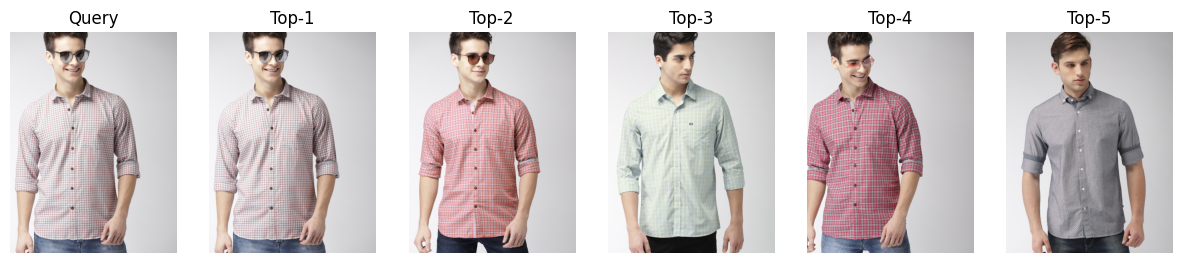

In [ ]:
query_image = "/content/drive/MyDrive/shirt_images_permanent/7080008.jpg"
top5 = fetch_top_k(query_image, embedding_net, index, dataset_paths, k=5)
print("Top 5 similar shirts:", top5)
show_images(query_image, top5)


In [ ]:
import pickle

# Save FAISS index
faiss.write_index(index, "/content/drive/MyDrive/shirt_index.faiss")

# Save embeddings + paths
with open("/content/drive/MyDrive/shirt_data.pkl", "wb") as f:
    pickle.dump({"paths": dataset_paths, "embeddings": all_embeddings}, f)

print("✅ Saved index and data!")


NameError: name 'faiss' is not defined

In [ ]:
# Load FAISS index
index = faiss.read_index("/content/drive/MyDrive/shirt_index.faiss")

# Load dataset paths + embeddings
with open("/content/drive/MyDrive/shirt_data.pkl", "rb") as f:
    data = pickle.load(f)
    dataset_paths = data["paths"]
    all_embeddings = data["embeddings"]

print(f"✅ Loaded index with {len(dataset_paths)} shirts")
top5 = fetch_top_k(query_image, embedding_net, index, dataset_paths, k=5)
show_images(query_image, top5)


NameError: name 'faiss' is not defined

In [ ]:
top5 = fetch_top_k(query_image, embedding_net, index, dataset_paths, k=5)
show_images(query_image, top5)


NameError: name 'fetch_top_k' is not defined